# Desafío Número 1: Equipo 7

<a id="section_indice"></a> 
## Indice

[Introduccion](#section_introduccion)

[Dataset](#section_dataset)

[Limpieza de datos](#section_limpieza)

$\hspace{.5cm}$[Rooms](#section_limpieza_rooms)
  
$\hspace{.5cm}$[Expensas](#section_limpieza_expensas)

$\hspace{.5cm}$[Geonames](#section_limpieza_geonames)

$\hspace{.5cm}$[Pisos](#section_limpieza_pisos)

$\hspace{.5cm}$[Antigüedad](#section_limpieza_antiguedad)

$\hspace{.5cm}$[Precios](#section_limpieza_precios)

$\hspace{.5cm}$[Places](#section_limpieza_places)


[Definición de mitos o realidades](#section_mitos_o_realidades)

$\hspace{.5cm}$[Mito o Realidad N° 1: Los inmuebles a estrenar son más caros que los demás](#section_mito_1)

$\hspace{.5cm}$[Mito o Realidad N° 2: Existe una correlación entre el precio del inmueble y las expensas que abonan](#section_mito_2)

$\hspace{.5cm}$[Mito o Realidad N° 3: Dentro del AMBA, Properati tiene mayor participación en Capital Federal](#section_mito_3)

$\hspace{.5cm}$[Mito o Realidad N° 4: A medida que una propiedad tiene más pisos, aumenta su precio](#section_mito_4)

$\hspace{.5cm}$[Mito o Realidad N° 5: La presencia de amenities en la propiedad impacta en un aumento en el precio de la misma](#section_mito_5)

$\hspace{.5cm}$[Mito o Realidad N° 6: Hay una mayor proporcion de inmuebles pequeños en la base de Properati](#section_mito_6)



<a id="section_introduccion"></a> 

## Introducción

[volver a Indice](#section_indice)

El objetivo del desafío es generar la limpieza de una base de datos de "Properati" con observaciones sobre operaciones de venta de inmuebles aparentemente de Argentina.
Con el objetivo de visualizar los principales indicadores y responder una serie de preguntas planteadas, se procedió a la estrategia de limpieza.

Estrategia de limpieza: Se dividieron las columnas principales del dataset entre los integrantes del equipo, y se procedió a realizar la limpieza con prioridad en los datos existentes, complementando a través de regex los datos encontrados en las columnas "Title" y "Description".

El nuevo dataset cuenta con una limpieza del 50% de los datos nulos, y se agregaron nuevas columnas que aportan información acerca del valor de la propiedad.


<a id="section_dataset"></a> 

## Dataset

[volver a Indice](#section_indice)

In [6]:
import pandas as pd
import numpy as np
import re 

In [7]:
#Levantamos el archivo de trabajo
data_location = "properati.csv"
data = pd.read_csv(data_location, sep=",")

#Analizamos el tipo de dato de cada variable
print(f'Tipo de datos de variables')
print(data.dtypes)


print('--------------------------------------------')
#Analizamos los nulos existentes en cada variable
print(f'Porcentaje de variables nulas')
nulos = data.isnull()
cant_no_nulos = round(nulos.sum()/data.shape[0]*100,2)
print(cant_no_nulos)

#Vusalizamos las primeras observaciones del data set
data.head(3)

Tipo de datos de variables
Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail        

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


<a id="section_limpieza"></a> 

## Limpieza del dataset de Properati

[volver a Indice](#section_indice)

<a id="section_limpieza_rooms"></a> 

### Limpieza de columna Rooms

[volver a Indice](#section_indice)

In [8]:
data["rooms_completo"] =data["rooms"]
data_room_null_description = data.description.astype(str).str.lower()
data_room_null_title = data.title.astype(str).str.lower()
display(data_room_null_description)
display(data_room_null_title)

0         2 ambientes tipo casa planta baja por pasillo,...
1         venta de departamento en décimo piso al frente...
2         2 ambientes 3er piso lateral living comedor am...
3         ph 3 ambientes con patio. hay 3 deptos en lote...
4         departamento con fantástica iluminación natura...
                                ...                        
121215    torre forum alcorta - máxima categoría.impecab...
121216    excelente e impecable casa en venta en las lom...
121217    venta departamento ambiente divisible a estren...
121218    2 amb al contrafrente,  luminoso. el departame...
121219    departamento de 77 m2 apto profesional. edific...
Name: description, Length: 121220, dtype: object

0                        2 amb tipo casa sin expensas en pb
1         venta depto 2 dorm. a estrenar 7 e/ 36 y 37   ...
2                  2 amb 3er piso con ascensor apto credito
3                              ph 3 amb. cfte. reciclado   
4         depto 2 amb al contrafrente zona centro/plaza ...
                                ...                        
121215           torre forum alcorta- impecable 3 ambientes
121216    ruca inmuebles | venta | lomas de san isidro |...
121217    venta departamento ambiente divisible a estren...
121218    2 amb. c/ dep. de servicio al contrafrente| re...
121219           departamento apto profesional en el centro
Name: title, Length: 121220, dtype: object

In [9]:
print("Primer grupo de filas sin rooms")
data["rooms_completo"].isnull().value_counts()

Primer grupo de filas sin rooms


True     73830
False    47390
Name: rooms_completo, dtype: int64

Seteamos los que son monoambientes
Primero buscamos las palabras que identifiquen al monoambiente. 
Luego buscamos las coincidencias dentro del universo de coincidencias del campo descripción
donde hubo coincidencias, le asignamos 1. 

In [10]:
def fun_buscar_patt(data_validar,patt_room):
    patt_regex = re.compile(patt_room)
    data_match = data_validar.apply(lambda x:  x if x is np.NaN else patt_regex.search(x))
    return data_match

In [11]:
def fun_buscar_disminuir(data_room_null_description, patt,restar):
    ###se pasa la palabra y se asigna###
    data_encontrada= fun_buscar_patt(data_room_null_description,patt)
    encontradas = data_encontrada[data_encontrada.notnull()].apply(lambda x: x.group(1))
    room_null_mask = data["rooms_completo"].isnull()
    data.loc[room_null_mask,"rooms_completo"]= encontradas[room_null_mask].apply(lambda x: x if x is np.NaN else (float(x)-restar)).astype(int)
    print("Disminución en función a los ambientes tipo:",patt)
    result = data["rooms_completo"].isnull().value_counts()
    return result

In [12]:
def fun_buscar_disminuir_mapper(data_room_null_description, patt,restar):
    ###se pasa la palabra y se asigna y se mapea el texto###
    data_encontrada= fun_buscar_patt(data_room_null_description,patt)
    encontradas = data_encontrada[data_encontrada.notnull()].apply(lambda x: x.group(1))
    room_null_mask = data["rooms_completo"].isnull()
    numcol_cat_mapper = {
       'un': 1,'uun':1, 'uno': 1,'dos': 2,'tres': 3,'cuatro':4,
        'cinco':5,'sinco':5,'seis':6,'ceis':6,'siete':7,
        'ciete':7,'ocho':8,'nueve':9,'diez':10,'once':11,
        'doce':12,'trece':13,'catorce':14,'quince':15,
        'dieciseis':16,'diecisiete':17,'dieciocho':18,'diecinueve':19,
        'veinte':20
    }
    encontradas1 = encontradas.map(numcol_cat_mapper)
    data.loc[room_null_mask,"rooms_completo"]= encontradas1[room_null_mask].apply(lambda x: x if x is np.NaN else (float(x)-restar))
    print("Disminución en función a los ambientes :",patt)
    result = data["rooms_completo"].isnull().value_counts()
    return result

In [13]:
#validar que luego elija siempre la última que encuentre

In [14]:
def fun_buscar_disminuir_mapper_2(data_room_null_description, patt,restar):
    ###se pasa la palabra y se asigna y se mapea el texto###
    data_encontrada= fun_buscar_patt(data_room_null_description,patt)
    encontradas = data_encontrada[data_encontrada.notnull()].apply(lambda x: x.group(1))
    room_null_mask = data["rooms_completo"].isnull()
    numcol_cat_mapper = {
                'segundo': 2,'tercer':3, 'cuarto': 4,'quinto': 5,'sexto': 6
    }
    encontradas1 = encontradas.map(numcol_cat_mapper)
    data.loc[room_null_mask,"rooms_completo"]= encontradas1[room_null_mask].apply(lambda x: x if x is np.NaN else (float(x)-restar))
    print("Disminución en función a los ambientes :",patt)
    result = data["rooms_completo"].isnull().value_counts()
    return result

In [15]:
def disminuciones_repeticion(serie,patt):
    print(data["rooms_completo"].isnull().value_counts())
    data_encontrada = serie.apply(lambda x: x if x is np.NaN else x.count(patt))
    maskarita= data_encontrada>0|data["rooms_completo"].isnull()
    data.loc[maskarita,"rooms_completo"] = data_encontrada[maskarita]
    result = data["rooms_completo"].isnull().value_counts()
    return result

In [16]:
data_room_match = fun_buscar_patt(data_room_null_description,r"(mono ambiente|monoambiente|mono-ambiente|Monoamb)")
data_room_match_mask = data_room_match.notnull()
data_room_match[data_room_match_mask]=0
data_room_mask = data["rooms_completo"].isnull()

data.loc[data_room_match_mask,"rooms_completo"] = data_room_match[data_room_match_mask].apply(lambda x: x if x is np.NaN else x)
print("Primera disminución Monoambientes")
display(data["rooms_completo"].isnull().value_counts())

Primera disminución Monoambientes


True     69080
False    52140
Name: rooms_completo, dtype: int64

In [17]:
data_room_match = fun_buscar_patt(data_room_null_title,r"(mono ambiente|monoambiente|mono-ambiente|monoamb)")
data_room_match_mask = data_room_match.notnull()
data_room_match[data_room_match_mask]=0
data_room_mask = data["rooms_completo"].isnull()

data.loc[data_room_match_mask,"rooms_completo"] = data_room_match[data_room_match_mask].apply(lambda x: x if x is np.NaN else x)
print("Primera disminución Monoambientes")
display(data["rooms_completo"].isnull().value_counts())

Primera disminución Monoambientes


True     68675
False    52545
Name: rooms_completo, dtype: int64

In [18]:
resultado = fun_buscar_disminuir(data_room_null_description,r"[\s](\d\d)[\s]?habitaci",0)
print(resultado)

Disminución en función a los ambientes tipo: [\s](\d\d)[\s]?habitaci
True     68631
False    52589
Name: rooms_completo, dtype: int64


In [19]:
resultado = fun_buscar_disminuir_mapper(data_room_null_description,r"(\w+)[\s]?(dormitorio|domitorio)",0)
print(resultado)

Disminución en función a los ambientes : (\w+)[\s]?(dormitorio|domitorio)
False    64513
True     56707
Name: rooms_completo, dtype: int64


In [20]:
resultado = fun_buscar_disminuir_mapper_2(data_room_null_description,r"(\w+)[\s]?(dormitorio|domitorio)",0)
print(resultado)

Disminución en función a los ambientes : (\w+)[\s]?(dormitorio|domitorio)
False    65214
True     56006
Name: rooms_completo, dtype: int64


In [21]:
resultado = fun_buscar_disminuir_mapper(data_room_null_description,r"(\w+)[\s]?(ambiente)",1)
print(resultado)

Disminución en función a los ambientes : (\w+)[\s]?(ambiente)
False    67069
True     54151
Name: rooms_completo, dtype: int64


In [22]:
resultado = fun_buscar_disminuir(data_room_null_description,r"[\s](\d)[\s]?(amb)",1)
print(resultado)

Disminución en función a los ambientes tipo: [\s](\d)[\s]?(amb)
False    82384
True     38836
Name: rooms_completo, dtype: int64


In [23]:
resultado = fun_buscar_disminuir(data_room_null_description,r"\D(\d)[\s]?(dorm)",0)
print(resultado)

Disminución en función a los ambientes tipo: \D(\d)[\s]?(dorm)
False    100893
True      20327
Name: rooms_completo, dtype: int64


In [24]:
resultado = fun_buscar_disminuir(data_room_null_title,r"\D(\d?\d)[\s]?(dorm)",0)
print(resultado)

Disminución en función a los ambientes tipo: \D(\d?\d)[\s]?(dorm)
False    101365
True      19855
Name: rooms_completo, dtype: int64


In [25]:
resultado = fun_buscar_disminuir(data_room_null_description,r"(\d)[\s]?(suite)",0)
print(resultado)

Disminución en función a los ambientes tipo: (\d)[\s]?(suite)
False    101515
True      19705
Name: rooms_completo, dtype: int64


Buscamos ahora las restantes en el título

In [26]:
resultado = fun_buscar_disminuir(data_room_null_title,r"([\s]\d?\d)[\s]?amb",1)
print(resultado)

Disminución en función a los ambientes tipo: ([\s]\d?\d)[\s]?amb
False    102495
True      18725
Name: rooms_completo, dtype: int64


In [27]:
resultado = fun_buscar_disminuir_mapper(data_room_null_title,r"(\w+)[\s]?(amb)",1)
print(resultado)

Disminución en función a los ambientes : (\w+)[\s]?(amb)
False    102663
True      18557
Name: rooms_completo, dtype: int64


In [28]:
disminuciones_repeticion(data_room_null_description,"dormitorio")

False    102663
True      18557
Name: rooms_completo, dtype: int64


False    104570
True      16650
Name: rooms_completo, dtype: int64

In [29]:
disminuciones_repeticion(data_room_null_description,"habitacion")


False    104570
True      16650
Name: rooms_completo, dtype: int64


False    104948
True      16272
Name: rooms_completo, dtype: int64

In [30]:
disminuciones_repeticion(data_room_null_description,"suite")

False    104948
True      16272
Name: rooms_completo, dtype: int64


False    105281
True      15939
Name: rooms_completo, dtype: int64

## `SETEANDO RESTO DE ROOMS EN NULL`
ALGUNOS AJUSTES POSTERIORES ESPECÍFICOS PORQUE LA REGEX LOS TOMÓ Y NO APLICABA


AQUÍ SETEO EL RESTO QUE SE ENCUENTRA EN NULL

In [31]:
def fun_back(idreg):
    data.loc[idreg:idreg,"rooms_completo"]=data.loc[idreg:idreg,"rooms"]
    return data.loc[idreg:idreg,"rooms_completo"]
fun_back(53793)
fun_back(23884)

23884   NaN
Name: rooms_completo, dtype: float64

In [32]:
data["rooms_completo"].fillna(0,inplace = True) 
print(data["rooms_completo"].isnull().value_counts())

False    121220
Name: rooms_completo, dtype: int64


## `AGREGANDO CAMPOS NUEVOS`
Se crean nuevos campos para definir características que pueden revalorizar la propiedad
____

In [33]:
data_encontrada1= fun_buscar_patt(data_room_null_description,"(\w+)[\s]?(\w+)[\s]?(pileta|piscina|pisina|picina)")
encontradas_pileta = data_encontrada1[data_encontrada1.notnull()].apply(lambda x: x.group(0))
data["PILETA"] = encontradas_pileta.apply(lambda x: False if x.count("sin")>0 else True)
data["PILETA"].fillna(value=False, inplace=True)
data["PILETA"].value_counts()

False    104706
True      16514
Name: PILETA, dtype: int64

In [34]:
data_encontrada_parrilla= fun_buscar_patt(data_room_null_description,"(\w+)[\s]?(\w+)[\s]?(parrilla|asado|grill|churrasquera)")
encontradas_parrilla = data_encontrada_parrilla[data_encontrada_parrilla.notnull()].apply(lambda x: x.group(0))
data["PARRILLA"] = encontradas_parrilla.apply(lambda x: False if x.count("sin")>0 else True)
data["PARRILLA"].fillna(value=False, inplace=True)
# data["PARRILLA"]= data_encontrada_parrilla.notnull()
data["PARRILLA"].value_counts()

False    93220
True     28000
Name: PARRILLA, dtype: int64

In [35]:
data_encontrada_patio= fun_buscar_patt(data_room_null_description,"(\w+)[\s]?(\w+)[\s]?(patio|jardin)")
encontradas_patio = data_encontrada_patio[data_encontrada_patio.notnull()].apply(lambda x: x.group(0))
data["PATIO_JARDIN"] = encontradas_patio.apply(lambda x: False if x.count("sin")>0 else True)
data["PATIO_JARDIN"].fillna(value=False, inplace=True)
data["PATIO_JARDIN"].value_counts()

False    104289
True      16931
Name: PATIO_JARDIN, dtype: int64

ESTO ES PARA REALIZAR VALIDACIÓN DE DATOS


______


In [36]:
bins= [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40]
room= pd.cut(data.rooms_completo, bins,right=False)

In [37]:
data.pivot_table('rooms_completo', index=[room], columns='property_type', aggfunc='count' )

property_type,PH,apartment,house,store
rooms_completo,,,,
"[1, 2)",3136.0,36930.0,23846.0,362.0
"[2, 3)",1394.0,12378.0,7558.0,145.0
"[3, 4)",545.0,4631.0,2979.0,79.0
"[4, 5)",161.0,1170.0,1047.0,14.0
"[5, 6)",46.0,323.0,409.0,12.0
"[6, 7)",22.0,136.0,152.0,6.0
"[7, 8)",6.0,81.0,77.0,4.0
"[8, 9)",1.0,64.0,34.0,1.0
"[9, 10)",NaN,22.0,19.0,NaN


<a id="section_limpieza_expensas"></a> 

### Limpieza de columna Expensas

[volver a Indice](#section_indice)


#### Vemos que porcentaje de las filas de expensas tienen NA y creamos un dataset solo con los que tienen datos

In [38]:
#Separo los casos que son NA, los que tienen algun numero y de ellos los que son iguales a 1
mask_filas_con_expensas_na = data.expenses.isna()
mask_filas_con_expensas_notna = data.expenses.notna()
mask_filas_con_expensas_1 = data.expenses == 1

print(f'El total de filas es de {data.shape[0]}')
print(f'Hay {mask_filas_con_expensas_notna.sum()} filas con expensas, son el {round((mask_filas_con_expensas_notna.sum())/(data.shape[0]),2)*100}%')

El total de filas es de 121220
Hay 14262 filas con expensas, son el 12.0%


#### Aplicamos la siguiente logica: si el tipo de propiedad es casa o PH, expensas = NO. Si es departamento o store = SI. Y si no tiene info tomamos el promedio de expensas segun los metros cuadrados.

In [39]:
mask_apartment = data.property_type == "apartment"
mask_house = data.property_type == "house"
mask_PH = data.property_type == "PH"
mask_store = data.property_type == "store"

In [40]:
data['expenses_bool'] = np.select([mask_apartment, mask_house, mask_PH, mask_store], 
                            ['SI', 'NO', 'NO', 'SI'], 
                            default=np.nan)
data.expenses_bool.value_counts()

SI    75201
NO    46019
Name: expenses_bool, dtype: int64

#### De los casos que pagan expensas analizamos nuevamente los datos

In [41]:
#Armo un df con los casos que pagan expensas
mask_si_expensas = data.expenses_bool == "SI"
con_expensas = data.loc[mask_si_expensas,:]
con_expensas['expenses'].describe().apply(lambda x: format(x, 'f'))

count       11606.000000
mean         4907.131570
std        132691.813566
min             1.000000
25%          1000.000000
50%          1700.000000
75%          3100.000000
max      10001500.000000
Name: expenses, dtype: object

In [42]:
con_expensas.expenses.value_counts().sort_index()

1.0           850
2.0            54
3.0             1
4.0             2
5.0             2
             ... 
550000.0        1
1000000.0       1
1100000.0       1
1200000.0       1
10001500.0      2
Name: expenses, Length: 941, dtype: int64

#### Identificamos como desconocidos los casos atipicos (menor a 100 y mayor a 200.000) y los NA

In [43]:
mask_mayor_doscientosmil = con_expensas.expenses <= 200000
mask_menor_cien = con_expensas.expenses >= 100

mask_conocidos = np.logical_and(mask_mayor_doscientosmil, mask_menor_cien)
mask_desconocidos = np.logical_not(mask_conocidos)

# con_expensas = con_expensas.loc[mask_quantil_noventaycinco, :]
# con_expensas.expenses.value_counts().sort_index()

In [44]:
print(mask_conocidos.sum())
print(mask_desconocidos.sum())

10664
64537


In [45]:
con_expensas_desconocidos = con_expensas.loc[mask_desconocidos,:]
con_expensas_conocidos = con_expensas.loc[mask_conocidos,:]
con_expensas_conocidos.expenses.describe().apply(lambda x: format(x, 'f'))

count     10664.000000
mean       3011.734902
std        3917.418488
min         100.000000
25%        1100.000000
50%        1860.000000
75%        3500.000000
max      110000.000000
Name: expenses, dtype: object

In [46]:
con_expensas_conocidos.groupby('rooms')['expenses'].mean()

rooms
1.0     1541.115672
2.0     1576.646179
3.0     2756.033223
4.0     5040.478378
5.0    10888.910000
6.0    11223.809524
7.0     5014.285714
8.0    12000.000000
Name: expenses, dtype: float64

#### A los casos desconocidos les aplicamos el promedio por cantidad de habitaciones

In [47]:
con_expensas_desconocidos = con_expensas_desconocidos.join(con_expensas_conocidos.groupby('rooms_completo')['expenses'].mean(), on='rooms_completo', rsuffix='_nuevo')

#### Unificamos los montos de expensas

In [48]:
import warnings
warnings.filterwarnings("ignore")
con_expensas_conocidos.loc[:, 'expenses_nuevo'] = con_expensas_conocidos.loc[:, 'expenses'].copy()
con_expensas_conocidos.shape

(10664, 32)

In [49]:
con_expensas_desconocidos.shape

(64537, 32)

In [50]:
mask_no_expensas = data.expenses_bool == "NO"
sin_expensas = data.loc[mask_no_expensas,:]
sin_expensas.loc[:, 'expenses_nuevo'] = 0
sin_expensas.shape


(46019, 32)

In [51]:
data = pd.concat([con_expensas_conocidos, con_expensas_desconocidos, sin_expensas])
data = data.sort_index()


<a id="section_limpieza_geonames"></a> 

### Limpieza de la columna Geonames

[volver a Indice](#section_indice)


In [52]:
data_geolocalizacion = data.loc[ : , ["place_name", "place_with_parent_names", "geonames_id", "lat-lon", "lat", "lon"]]
display(data_geolocalizacion.head(10))
print(data_geolocalizacion.shape)

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
0,Mataderos,|Argentina|Capital Federal|Mataderos|,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,Mataderos,|Argentina|Capital Federal|Mataderos|,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,Liniers,|Argentina|Capital Federal|Liniers|,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447
5,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828
6,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782
7,Belgrano,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362
8,Belgrano,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362
9,Rosario,|Argentina|Santa Fe|Rosario|,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919


(121220, 6)


In [53]:
nulos =data_geolocalizacion.isnull()
nulos.sum()

place_name                    23
place_with_parent_names        0
geonames_id                18717
lat-lon                    51550
lat                        51550
lon                        51550
dtype: int64

In [54]:
geo_nulos = data_geolocalizacion.loc[nulos.index].sort_values('place_name')
geo_nulos.head()

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
42404,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,NaN,"-34.3782857,-58.7541862",-34.378286,-58.754186
45159,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,NaN,"-34.377446,-58.756042",-34.377446,-58.756042
33586,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,NaN,"-34.3773892772,-58.756005714",-34.377389,-58.756006
23730,los alamos,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre| los...,NaN,"-34.4239891,-58.601876",-34.423989,-58.601876
84843,9 de Abril,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...,NaN,NaN,NaN,NaN


In [55]:
geo_nulos['place_name'].value_counts().sort_values(ascending=False).head(50)

Córdoba                    9254
Rosario                    8504
Mar del Plata              6534
Tigre                      3324
Nordelta                   3315
Belgrano                   2992
Palermo                    2885
La Plata                   2534
Caballito                  2273
Pilar                      2228
Villa Urquiza              1632
Olivos                     1590
Recoleta                   1547
Lomas de Zamora            1529
Flores                     1354
Ituzaingó                  1340
Villa Crespo               1331
Capital Federal            1297
San Telmo                  1216
Morón                      1209
Almagro                    1165
Barrio Norte               1140
Ramos Mejía                1127
Martínez                   1058
Lanús                      1048
Escobar                    1037
Banfield                   1007
San Isidro                  990
Pinamar                     932
Boedo                       890
Nuñez                       778
San Migu

### LIMPIEZA CORDOBA

In [56]:
mask_cordoba = geo_nulos['place_name']== "Córdoba"
datos_cordoba = geo_nulos.loc[mask_cordoba, :]
#datos_cordoba.sort_values(by="geonames_id").sample(10)

In [57]:
#datos_cordoba.isnull().sum()

In [58]:
#display(datos_cordoba.groupby(['geonames_id']).mean())

In [59]:
geo_mask_1 = datos_cordoba.place_with_parent_names == "|Argentina|Córdoba|Córdoba|"
geo_mask_2 = datos_cordoba.place_with_parent_names == "|Argentina|Córdoba|"

data_geolocalizacion_cordoba_3860259 = datos_cordoba.loc[geo_mask_1, :]
values_3860259 = {"geonames_id":3860259.0, "place_name":"Córdoba","place_with_parent_names": "|Argentina|Córdoba|Córdoba|", "lat-lon" : "-31.421912, -64.192741", "lat": -31.421912, "lon": -64.192741}

data_geolocalizacion_cordoba_3860255 = datos_cordoba.loc[geo_mask_2, :]
values_3860255 = {"geonames_id":3860255.0, "place_name":"Córdoba","place_with_parent_names": "|Argentina|Córdoba|","lat-lon" : "-31.411897, -64.269298", "lat": -31.411897, "lon": -64.269298}

datos_cordoba_con_3860259 = datos_cordoba.fillna(values_3860259)
datos_cordoba_completo = datos_cordoba.fillna(values_3860255)
#datos_cordoba_completo.head()


In [60]:
#datos_cordoba_completo.isnull().sum()

In [61]:
geo_nulos = geo_nulos.fillna(datos_cordoba_completo)
geo_nulos.isnull().sum()

place_name                    23
place_with_parent_names        0
geonames_id                18717
lat-lon                    45809
lat                        45809
lon                        45809
dtype: int64

### LIMPIEZA ROSARIO

In [62]:
mask_rosario = geo_nulos['place_name']== "Rosario"
datos_rosario = geo_nulos.loc[mask_rosario, :]
#datos_rosario.sort_values(by="geonames_id").sample(10)

In [63]:
#datos_rosario.isnull().sum()

In [64]:
#display(datos_rosario.groupby(['geonames_id']).mean())

In [65]:
values_3838574 = {"geonames_id":3838574.0, "place_name":"Rosario","place_with_parent_names": "|Argentina|Santa Fe|Rosario|","lat-lon" : "-32.9473, -60.661795", "lat": -32.9473, "lon": -60.661795}
datos_rosario_completo = datos_rosario.fillna(values_3838574)
#datos_rosario_completo.head()

In [66]:
#datos_rosario_completo.isnull().sum()

In [67]:
geo_nulos = geo_nulos.fillna(datos_rosario_completo)
geo_nulos.isnull().sum()

place_name                    23
place_with_parent_names        0
geonames_id                18717
lat-lon                    41291
lat                        41291
lon                        41291
dtype: int64

### LIMPIEZA MAR DEL PLATA

In [68]:
mask_mar_del_plata = geo_nulos['place_name']== "Mar del Plata"
datos_mar_del_plata = geo_nulos.loc[mask_mar_del_plata, :]
#datos_mar_del_plata.sort_values(by="geonames_id").sample(10)

In [69]:
#datos_mar_del_plata.isnull().sum()

In [70]:
#display(datos_mar_del_plata.groupby(['geonames_id']).mean())

In [71]:
values_3430863 = {"geonames_id":3430863.0, "place_name":"Mar del Plata","place_with_parent_names": "|Argentina|Buenos Aires Costa Atlántica|Mar de...","lat-lon" : "-38.006377, -57.553465", "lat": -38.006377, "lon": -57.553465}
datos_mar_del_plata_completo = datos_mar_del_plata.fillna(values_3430863)
#datos_mar_del_plata_completo.head()

In [72]:
#datos_mar_del_plata_completo.isnull().sum()

In [73]:
geo_nulos = geo_nulos.fillna(datos_mar_del_plata_completo)
geo_nulos.isnull().sum()

place_name                    23
place_with_parent_names        0
geonames_id                18717
lat-lon                    40589
lat                        40589
lon                        40589
dtype: int64

### LIMPIEZA TIGRE

In [74]:
mask_tigre = geo_nulos['place_name']== "Tigre"
datos_tigre = geo_nulos.loc[mask_tigre, :]
#datos_tigre.sort_values(by="geonames_id").sample(10)

In [75]:
#datos_tigre.isnull().sum()

In [76]:
#display(datos_tigre.groupby(['geonames_id']).mean())

In [77]:
values_3427753 = {"geonames_id":3427753.0, "place_name":"Tigre","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|","lat-lon" : "-34.408622, -58.636493", "lat": -34.408622, "lon": -58.636493}
datos_tigre_completo = datos_tigre.fillna(values_3427753)
#datos_tigre_completo.head()

In [78]:
#datos_tigre_completo.isnull().sum()

In [79]:
geo_nulos = geo_nulos.fillna(datos_tigre_completo)
geo_nulos.isnull().sum()

place_name                    23
place_with_parent_names        0
geonames_id                17752
lat-lon                    38801
lat                        38801
lon                        38801
dtype: int64

In [80]:
mask_tigre2 = geo_nulos['place_with_parent_names'] == "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||"
datos_tigre2 = geo_nulos.loc[mask_tigre2, :]
datos_tigre_completo2 = datos_tigre2.fillna(values_3427753)
datos_tigre_completo2.head()

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
6489,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,3427753.0,"-34.4008968545,-58.63809847",-34.400897,-58.638098
10201,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,3427753.0,"-34.400704,-58.638067",-34.400704,-58.638067
11451,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,3427753.0,"-34.4026880384,-58.6262613379",-34.402688,-58.626261
14839,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,3427753.0,"-34.4007994779,-58.6381735719",-34.400799,-58.638174
18622,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,3427753.0,"-34.4032781195,-58.6263503945",-34.403278,-58.626350


In [81]:
geo_nulos = geo_nulos.fillna(datos_tigre_completo2)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                17729
lat-lon                    38801
lat                        38801
lon                        38801
dtype: int64

### LIMPIEZA NORDELTA

In [82]:
mask_nordelta = geo_nulos['place_name']== "Nordelta"
datos_nordelta = geo_nulos.loc[mask_nordelta, :]
#datos_nordelta.sort_values(by="geonames_id").sample(10)

In [83]:
#datos_nordelta.isnull().sum()

In [84]:
#datos_nordelta.mean()

In [85]:
values_3427753_Nord = {"geonames_id":3427753.0, "place_name":"Nordelta","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...","lat-lon" : "-34.410920, -58.644708", "lat": -34.410920, "lon": -58.644708}
datos_nordelta_completo = datos_nordelta.fillna(values_3427753_Nord)
#datos_nordelta_completo.head()

In [86]:
#datos_nordelta_completo.isnull().sum()

In [87]:
geo_nulos = geo_nulos.fillna(datos_nordelta_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14414
lat-lon                    37050
lat                        37050
lon                        37050
dtype: int64

### LIMPIEZA BELGRANO

In [88]:
mask_belgrano = geo_nulos['place_name']== "Belgrano"
datos_belgrano = geo_nulos.loc[mask_belgrano, :]
#datos_belgrano.sort_values(by="geonames_id").sample(10)

In [89]:
#datos_belgrano.isnull().sum()

In [90]:
#display(datos_belgrano.groupby(['geonames_id']).mean())

In [91]:
values_3436077 = {"geonames_id":3436077.0, "place_name":"Belgrano","place_with_parent_names": "|Argentina|Capital Federal|Belgrano|","lat-lon" : "-34.563541, -58.453904", "lat": -34.563541, "lon": -58.453904}
datos_belgrano_completo = datos_belgrano.fillna(values_3436077)
#datos_belgrano_completo.head()

In [92]:
#datos_belgrano_completo.isnull().sum()

In [93]:
geo_nulos = geo_nulos.fillna(datos_belgrano_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14414
lat-lon                    36031
lat                        36031
lon                        36031
dtype: int64

### LIMPIEZA PALERMO

In [94]:
mask_palermo = geo_nulos['place_name']== "Palermo"
datos_palermo = geo_nulos.loc[mask_palermo, :]
#datos_palermo.sort_values(by="geonames_id").sample(10)

In [95]:
#datos_palermo.isnull().sum()

In [96]:
#display(datos_palermo.groupby(['geonames_id']).mean())

In [97]:
values_3430234 = {"geonames_id":3430234.0, "place_name":"Palermo","place_with_parent_names": "|Argentina|Capital Federal|Palermo|","lat-lon" : "-34.583105, -58.424693", "lat": -34.583105, "lon": -58.424693}
datos_palermo_completo = datos_palermo.fillna(values_3430234)
#datos_palermo_completo.head()

In [98]:
#datos_palermo_completo.isnull().sum()

In [99]:
geo_nulos = geo_nulos.fillna(datos_palermo_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14414
lat-lon                    35232
lat                        35232
lon                        35232
dtype: int64

### LIMPIEZA LA PLATA

In [100]:
mask_la_plata = geo_nulos['place_name']== "La Plata"
datos_la_plata = geo_nulos.loc[mask_la_plata, :]
#datos_la_plata.sort_values(by="geonames_id").sample(10)

In [101]:
#datos_la_plata.isnull().sum()

In [102]:
#display(datos_la_plata.groupby(['geonames_id']).mean())

In [103]:
values_3432039 = {"geonames_id":3432039.0, "place_name":"La Plata","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|","lat-lon" : "-34.924338, -57.966073", "lat": -34.924338, "lon": -57.966073}
datos_la_plata_completo = datos_la_plata.fillna(values_3432039)
#datos_la_plata_completo.head()

In [104]:
#datos_la_plata_completo.isnull().sum()

In [105]:
geo_nulos = geo_nulos.fillna(datos_la_plata_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14414
lat-lon                    33763
lat                        33763
lon                        33763
dtype: int64

### LIMPIEZA CABALLITO

In [106]:
mask_caballito = geo_nulos['place_name']== "Caballito"
datos_caballito = geo_nulos.loc[mask_caballito, :]
#datos_caballito.sort_values(by="geonames_id").sample(10)

In [107]:
#datos_caballito.isnull().sum()

In [108]:
#display(datos_caballito.groupby(['geonames_id']).mean())

In [109]:
values_3435874 = {"geonames_id":3435874.0, "place_name":"Caballito","place_with_parent_names": "|Argentina|Capital Federal|Caballito|","lat-lon" : "-34.618748, -58.442827", "lat": -34.618748, "lon": -58.442827}
datos_caballito_completo = datos_caballito.fillna(values_3435874)
#datos_caballito_completo.head()

In [110]:
#datos_caballito_completo.isnull().sum()

In [111]:
geo_nulos = geo_nulos.fillna(datos_caballito_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14414
lat-lon                    33317
lat                        33317
lon                        33317
dtype: int64

### LIMPIEZA PILAR

In [112]:
mask_pilar = geo_nulos['place_name']== "Pilar"
datos_pilar = geo_nulos.loc[mask_pilar, :]
#datos_pilar.sort_values(by="geonames_id").sample(10)

In [113]:
#datos_pilar.isnull().sum()

In [114]:
#display(datos_pilar.groupby(['geonames_id']).mean())

In [115]:
#display(datos_pilar.groupby(['geonames_id']).count())

In [116]:
values_3429979 = {"geonames_id":3429979.0, "place_name":"Pilar","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|","lat-lon" : "-34.448529, -58.868267", "lat": -34.448529, "lon": -58.868267}
datos_pilar_completo = datos_pilar.fillna(values_3429979)
#datos_pilar_completo.head()

In [117]:
#datos_pilar_completo.isnull().sum()

In [118]:
geo_nulos = geo_nulos.fillna(datos_pilar_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14046
lat-lon                    32059
lat                        32059
lon                        32059
dtype: int64

### LIMPIEZA VILLA URQUIZA

In [119]:
mask_villa_urquiza = geo_nulos['place_name']== "Villa Urquiza"
datos_villa_urquiza = geo_nulos.loc[mask_villa_urquiza, :]
#datos_villa_urquiza.sort_values(by="geonames_id").sample(10)

In [120]:
#datos_villa_urquiza.isnull().sum()

<!--     original	bajado	saldo
geo: 18717 - 4648 - 14069/
lat-lon: 51550 - 19491 - 32059/
lat: 51550 - 19491 - 32059/
lon: 51550 - 19491 - 32059 -->

In [121]:
#display(datos_villa_urquiza.groupby(['geonames_id']).mean())

In [122]:
values_3433775 = {"geonames_id":3433775.0, "place_name":"Villa Urquiza","place_with_parent_names": "|Argentina|Capital Federal|Villa Urquiza|","lat-lon" : "-34.573057, -58.483033", "lat": -34.573057, "lon": -58.483033}
datos_villa_urquiza_completo = datos_villa_urquiza.fillna(values_3429979)
#datos_villa_urquiza_completo.head()

In [123]:
#datos_villa_urquiza_completo.isnull().sum()

In [124]:
geo_nulos = geo_nulos.fillna(datos_villa_urquiza_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14046
lat-lon                    31515
lat                        31515
lon                        31515
dtype: int64

### LIMPIEZA OLIVOS

In [125]:
mask_olivos = geo_nulos['place_name']== "Olivos"
datos_olivos = geo_nulos.loc[mask_olivos, :]
#datos_olivos.sort_values(by="geonames_id").sample(10)

In [126]:
#datos_olivos.isnull().sum()

In [127]:
#display(datos_olivos.groupby(['geonames_id']).mean())

In [128]:
values_3430310 = {"geonames_id":3430310.0, "place_name":"Olivos","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...","lat-lon" : "-34.510486, -58.490124", "lat": -34.510486, "lon": -58.490124}
datos_olivos_completo = datos_olivos.fillna(values_3429979)
#datos_olivos_completo.head()

In [129]:
#datos_olivos_completo.isnull().sum()

In [130]:
geo_nulos = geo_nulos.fillna(datos_olivos_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14046
lat-lon                    30399
lat                        30399
lon                        30399
dtype: int64

### LIMPIEZA RECOLETA

In [131]:
mask_recoleta = geo_nulos['place_name']== "Recoleta"
datos_recoleta = geo_nulos.loc[mask_recoleta, :]
#datos_recoleta.sort_values(by="geonames_id").sample(10)

In [132]:
#datos_recoleta.isnull().sum()

In [133]:
#display(datos_recoleta.groupby(['geonames_id']).mean())

In [134]:
values_3429595 = {"geonames_id":3429595.0, "place_name":"Recoleta","place_with_parent_names": "|Argentina|Capital Federal|Recoleta|","lat-lon" : "-34.592, -58.395299", "lat": -34.592, "lon": -58.395299}
datos_recoleta_completo = datos_recoleta.fillna(values_3429595)
#datos_recoleta_completo.head()

In [135]:
#datos_recoleta_completo.isnull().sum()

In [136]:
geo_nulos = geo_nulos.fillna(datos_recoleta_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                14046
lat-lon                    30130
lat                        30130
lon                        30130
dtype: int64

### LIMPIEZA LOMAS DE ZAMORA

In [137]:
mask_lomas_de_zamora = geo_nulos['place_name']== "Lomas de Zamora"
datos_lomas_de_zamora = geo_nulos.loc[mask_lomas_de_zamora, :]
#datos_lomas_de_zamora.sort_values(by="geonames_id").sample(10)

In [138]:
#datos_lomas_de_zamora.isnull().sum()

In [139]:
#display(datos_lomas_de_zamora.groupby(['geonames_id']).mean())

In [140]:
values_3431270 = {"geonames_id":3431270.0, "place_name":"Lomas de Zamora","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...","lat-lon" : "-34.76043, -58.412512", "lat": -34.76043, "lon": -58.412512}
datos_lomas_de_zamora_completo = datos_lomas_de_zamora.fillna(values_3431270)
#datos_lomas_de_zamora_completo.head()

In [141]:
#datos_lomas_de_zamora_completo.isnull().sum()

In [142]:
geo_nulos = geo_nulos.fillna(datos_lomas_de_zamora_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    29136
lat                        29136
lon                        29136
dtype: int64

### LIMPIEZA FLORES

In [143]:
mask_flores = geo_nulos['place_name']== "Flores"
datos_flores = geo_nulos.loc[mask_flores, :]
#datos_flores.sort_values(by="geonames_id").sample(10)

In [144]:
#datos_flores.isnull().sum()

In [145]:
#display(datos_flores.groupby(['geonames_id']).mean())

In [146]:
values_3433918 = {"geonames_id":3433918.0, "place_name":"Flores","place_with_parent_names": "|Argentina|Capital Federal|Flores|","lat-lon" : "-34.628981, -58.46387", "lat": -34.628981, "lon": -58.46387}
datos_flores_completo = datos_flores.fillna(values_3431270)
#datos_flores_completo.head()

In [147]:
geo_nulos = geo_nulos.fillna(datos_flores_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    28981
lat                        28981
lon                        28981
dtype: int64

### LIMPIEZA ITUZAINGO

In [148]:
mask_ituzaingo = geo_nulos['place_name']== "Ituzaingó"
datos_ituzaingo = geo_nulos.loc[mask_ituzaingo, :]
#datos_ituzaingo.sort_values(by="geonames_id").sample(10)

In [149]:
#datos_ituzaingo.isnull().sum()

In [150]:
#display(datos_ituzaingo.groupby(['geonames_id']).mean())

In [151]:
geo_mask_3 = datos_ituzaingo.place_with_parent_names == "|Argentina|Corrientes|Ituzaingó|"
geo_mask_4 = datos_ituzaingo.place_with_parent_names == "|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|"

datos_ituzaingo_3433357 = datos_ituzaingo.loc[geo_mask_3, :]
values_3433357 = {"geonames_id":3433357.0, "place_name":"Ituzaingó","place_with_parent_names": "|Argentina|Corrientes|Ituzaingó|", "lat-lon" : "-27.573083, -56.705464", "lat": -27.573083, "lon": -56.705464}


datos_ituzaingo_3433359 = datos_ituzaingo.loc[geo_mask_4, :]
values_3860259 = {"geonames_id":3860259.0, "place_name":"Ituzaingó","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó||","lat-lon" : "-34.652894, -58.673752", "lat": -34.652894, "lon": -58.673752}


datos_ituzaingo_33433357 = datos_ituzaingo.fillna(values_3433357)
datos_ituzaingo_completo = datos_ituzaingo.fillna(values_3860259)
#datos_ituzaingo_completo.head()

In [152]:
#datos_ituzaingo_completo.isnull().sum()

In [153]:
geo_nulos = geo_nulos.fillna(datos_ituzaingo_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    28182
lat                        28182
lon                        28182
dtype: int64

### LIMPIEZA VILLA CRESPO

In [154]:
mask_villa_crespo = geo_nulos['place_name']== "Villa Crespo"
datos_villa_crespo = geo_nulos.loc[mask_villa_crespo, :]
#datos_villa_crespo.sort_values(by="geonames_id").sample(10)

In [155]:
#datos_villa_crespo.isnull().sum()

In [156]:
#display(datos_villa_crespo.groupby(['geonames_id']).mean())

In [157]:
values_3427458 = {"geonames_id":3427458.0, "place_name":"Villa Crespo","place_with_parent_names": "|Argentina|Capital Federal|Villa Crespo|","lat-lon" : "-34.597889, -58.439293", "lat": -34.597889, "lon": -58.439293}
datos_villa_crespo_completo = datos_villa_crespo.fillna(values_3427458)
#datos_villa_crespo_completo.head()

In [158]:
geo_nulos = geo_nulos.fillna(datos_villa_crespo_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    27792
lat                        27792
lon                        27792
dtype: int64

### LIMPIEZA CAPITAL FEDEREAL

In [159]:
mask_capital_federal = geo_nulos['place_name']== "Capital Federal"
datos_capital_federal = geo_nulos.loc[mask_capital_federal, :]
#datos_capital_federal.sort_values(by="geonames_id").sample(10)

In [160]:
#datos_capital_federal.isnull().sum()

In [161]:
#display(datos_capital_federal.groupby(['geonames_id']).mean())

In [162]:
values_3433955 = {"geonames_id":3433955.0, "place_name":"Capital Federal","place_with_parent_names": "|Argentina|Capital Federal|","lat-lon" : "-34.626709, -58.435882", "lat": -34.626709, "lon": -58.435882}
datos_capital_federal_completo = datos_capital_federal.fillna(values_3433955)
#datos_capital_federal_completo.head()

In [163]:
geo_nulos = geo_nulos.fillna(datos_capital_federal_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    27097
lat                        27097
lon                        27097
dtype: int64

### LIMPIEZA SAN TELMO

In [164]:
mask_san_telmo = geo_nulos['place_name']== "San Telmo"
datos_san_telmo = geo_nulos.loc[mask_san_telmo, :]
#datos_san_telmo.sort_values(by="geonames_id").sample(10)

In [165]:
#datos_san_telmo.isnull().sum()

In [166]:
#display(datos_san_telmo.groupby(['geonames_id']).mean())

In [167]:
values_3428113 = {"geonames_id":3428113.0, "place_name":"San Telmo","place_with_parent_names": "|Argentina|Capital Federal|San Telmo|","lat-lon" : "-34.620805, -58.376068", "lat": -34.620805, "lon": 	-58.376068}
datos_san_telmo_completo = datos_san_telmo.fillna(values_3428113)
#datos_san_telmo_completo.head()

In [168]:
geo_nulos = geo_nulos.fillna(datos_san_telmo_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    26635
lat                        26635
lon                        26635
dtype: int64

### LIMPIEZA MORON

In [169]:
mask_moron = geo_nulos['place_name']== "Morón"
datos_moron = geo_nulos.loc[mask_moron, :]
#datos_moron.sort_values(by="geonames_id").sample(10)

In [170]:
#datos_moron.isnull().sum()

In [171]:
#display(datos_moron.groupby(['geonames_id']).mean())

In [172]:
values_3430544 = {"geonames_id":3430544.0, "place_name":"Morón","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|","lat-lon" : "-34.654915, -58.62302", "lat": -34.654915, "lon": -58.62302}
datos_moron_completo = datos_moron.fillna(values_3430544)
#datos_moron_completo.head()

In [173]:
geo_nulos = geo_nulos.fillna(datos_moron_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    25944
lat                        25944
lon                        25944
dtype: int64

### LIMPIEZA ALMAGRO

In [174]:
mask_almagro = geo_nulos['place_name']== "Almagro"
datos_almagro = geo_nulos.loc[mask_almagro, :]
#datos_almagro.sort_values(by="geonames_id").sample(10)

In [175]:
#datos_almagro.isnull().sum()

In [176]:
#display(datos_almagro.groupby(['geonames_id']).mean())

In [177]:
values_3436397 = {"geonames_id":3436397.0, "place_name":"Almagro","place_with_parent_names": "|Argentina|Capital Federal|Almagro|","lat-lon" : "-34.608187, -58.421223", "lat": -34.608187, "lon": -58.421223}
datos_almagro_completo = datos_almagro.fillna(values_3436397)
#datos_almagro_completo.head()

In [178]:
geo_nulos = geo_nulos.fillna(datos_almagro_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    25741
lat                        25741
lon                        25741
dtype: int64

### LIMPIEZA BARRIO NORTE

In [179]:
mask_barrio_norte = geo_nulos['place_name']== "Barrio Norte"
datos_barrio_norte = geo_nulos.loc[mask_barrio_norte, :]
#datos_barrio_norte.sort_values(by="geonames_id").sample(10)

In [180]:
#datos_barrio_norte.isnull().sum()

In [181]:
#display(datos_barrio_norte.groupby(['geonames_id']).mean())

In [182]:
values_3436109 = {"geonames_id":3436109.0, "place_name":"Barrio Norte","place_with_parent_names": "	|Argentina|Capital Federal|Barrio Norte|","lat-lon" : "-34.593104, -58.400381", "lat": -34.593104, "lon": -58.400381}
datos_barrio_norte_completo = datos_barrio_norte.fillna(values_3436109)
#datos_barrio_norte_completo.head()

In [183]:
geo_nulos = geo_nulos.fillna(datos_barrio_norte_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    25513
lat                        25513
lon                        25513
dtype: int64

### LIMPIEZA RAMOS MEJIA

In [184]:
mask_ramos_mejia = geo_nulos['place_name']== "Ramos Mejía"
datos_ramos_mejia = geo_nulos.loc[mask_ramos_mejia, :]
#datos_ramos_mejia.sort_values(by="geonames_id").sample(10)

In [185]:
#datos_ramos_mejia.isnull().sum()

In [186]:
#display(datos_ramos_mejia.groupby(['geonames_id']).mean())

In [187]:
values_3429617 = {"geonames_id":3429617.0, "place_name":"Ramos Mejía","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...","lat-lon" : "-34.648363, -58.562762", "lat": -34.648363, "lon": -58.562762}
datos_ramos_mejia_completo = datos_ramos_mejia.fillna(values_3429617)
#datos_barrio_norte_completo.head()

In [188]:
geo_nulos = geo_nulos.fillna(datos_ramos_mejia_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    24850
lat                        24850
lon                        24850
dtype: int64

### LIMPIEZA MARTINEZ

In [189]:
mask_martinez = geo_nulos['place_name']== "Martínez"
datos_martinez = geo_nulos.loc[mask_martinez, :]
#datos_martinez.sort_values(by="geonames_id").sample(10)

In [190]:
#datos_martinez.isnull().sum()

In [191]:
#display(datos_martinez.groupby(['geonames_id']).mean())

In [192]:
values_3430813 = {"geonames_id":3430813.0, "place_name":"Martínez","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...","lat-lon" : "-34.492594, -58.506898", "lat": 	-34.492594, "lon": -58.506898}
datos_martinez_completo = datos_martinez.fillna(values_3430813)
#datos_martinez_completo.head()

In [193]:
geo_nulos = geo_nulos.fillna(datos_martinez_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                12793
lat-lon                    24017
lat                        24017
lon                        24017
dtype: int64

### LIMPIEZA LANUS

In [194]:
mask_lanus = geo_nulos['place_name']== "Lanús"
datos_lanus = geo_nulos.loc[mask_lanus, :]
#datos_lanus.sort_values(by="geonames_id").sample(10)

In [195]:
#datos_lanus.isnull().sum()

In [196]:
#display(datos_lanus.groupby(['geonames_id']).mean())

In [197]:
values_3432134 = {"geonames_id":3432134.0, "place_name":"Lanús","place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|","lat-lon" : "-34.701389, -58.398743", "lat": -34.701389, "lon": -58.398743}
datos_lanus_completo = datos_lanus.fillna(values_3432134)
#datos_lanus_completo.head()

In [198]:
geo_nulos = geo_nulos.fillna(datos_lanus_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    23290
lat                        23290
lon                        23290
dtype: int64

### LIMPIEZA ESCOBAR

In [199]:
mask_escobar = geo_nulos['place_name']== "Escobar"
datos_escobar = geo_nulos.loc[mask_escobar, :]
#datos_escobar.sort_values(by="geonames_id").sample(10)

In [200]:
#datos_escobar.isnull().sum()

In [201]:
display(datos_escobar.groupby(['geonames_id']).mean())

,lat,lon
geonames_id,,
3434130.0,-34.36929,-58.756345


In [202]:
values_3434130 = {"geonames_id":3434130.0, "place_name":"Escobar", "place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|","lat-lon" : "-34.36929, -58.756345", "lat": -34.36929, "lon": -58.756345}
datos_escobar_completo = datos_escobar.fillna(values_3434130)
#datos_escobar_completo.head()

In [203]:
geo_nulos = geo_nulos.fillna(datos_escobar_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    22541
lat                        22541
lon                        22541
dtype: int64

### LIMPIEZA BANFIELD

In [204]:
mask_banfield = geo_nulos['place_name']== "Banfield"
datos_banfield = geo_nulos.loc[mask_banfield, :]
#datos_banfield.sort_values(by="geonames_id").sample(10)

In [205]:
datos_banfield.isnull().sum()

place_name                   0
place_with_parent_names      0
geonames_id                  0
lat-lon                    757
lat                        757
lon                        757
dtype: int64

In [206]:
#display(datos_banfield.groupby(['geonames_id']).mean())

In [207]:
values_3436152 = {"geonames_id":3436152.0, "place_name":"Banfield", "place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...","lat-lon" : "-34.742923, -58.399492", "lat": -34.742923, "lon": -58.399492}
datos_banfield_completo = datos_banfield.fillna(values_3436152)#
#datos_banfield_completo.head()

In [208]:
geo_nulos = geo_nulos.fillna(datos_banfield_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    21784
lat                        21784
lon                        21784
dtype: int64

### LIMPIEZA SAN ISIDRO

In [209]:
mask_sa_isidro = geo_nulos['place_name']== "San Isidro"
datos_san_isidro = geo_nulos.loc[mask_sa_isidro, :]
#datos_san_isidro.sort_values(by="geonames_id").sample(10)

In [210]:
#datos_san_isidro.isnull().sum()

In [211]:
#display(datos_san_isidro.groupby(['geonames_id']).mean())

In [212]:
values_34289983 = {"geonames_id":3428983.0, "place_name":"San Isidro", "place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|","lat-lon" : "-34.478067, -58.536362", "lat": -34.478067, "lon": -58.536362}
datos_san_isidro_completo = datos_san_isidro.fillna(values_34289983)
#datos_san_isidro_completo.head()

In [213]:
geo_nulos = geo_nulos.fillna(datos_san_isidro_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    21090
lat                        21090
lon                        21090
dtype: int64

### LIMPIEZA PINAMAR

In [214]:
mask_pinarmar = geo_nulos['place_name']== "Pinamar"
datos_pinamar = geo_nulos.loc[mask_pinarmar, :]
datos_pinamar.sort_values(by="geonames_id").sample(10)

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
22223,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1145662,-56.8607055",-37.114566,-56.860706
52993,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.0867252017,-56.8343848952",-37.086725,-56.834385
19101,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1145080889,-56.8648566591",-37.114508,-56.864857
61754,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1020938,-56.845344",-37.102094,-56.845344
120084,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1093744,-56.8661754",-37.109374,-56.866175
47877,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.114863,-56.873013",-37.114863,-56.873013
14907,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.112112656,-56.862988381",-37.112113,-56.862988
7232,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1070137087,-56.8534370569",-37.107014,-56.853437
43501,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.0772374,-56.8342222",-37.077237,-56.834222
24046,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1210407577,-56.8608796317",-37.121041,-56.860880


In [215]:
datos_pinamar.isnull().sum()

place_name                   0
place_with_parent_names      0
geonames_id                  0
lat-lon                    116
lat                        116
lon                        116
dtype: int64

In [216]:
display(datos_pinamar.groupby(['geonames_id']).mean())

,lat,lon
geonames_id,,
3429971.0,-37.10956,-56.860607


In [217]:
values_3429971 = {"geonames_id":3429971.0, "place_name":"Pinamar", "place_with_parent_names": "|Argentina|Buenos Aires Costa Atlántica|Pinamar|","lat-lon" : "-37.10956	-56.860607", "lat": -37.10956, "lon": -56.860607}
datos_pinamar_completo = datos_pinamar.fillna(values_3429971)
datos_pinamar_completo.head()

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
968,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1093307,-56.8564926",-37.109331,-56.856493
120205,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.0991133862,-56.8405399116",-37.099113,-56.840540
113267,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.1257893563,-56.8652766178",-37.125789,-56.865277
46951,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.0841918,-56.8374748",-37.084192,-56.837475
40260,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,3429971.0,"-37.0808215463,-56.8267850348",-37.080822,-56.826785


In [218]:
geo_nulos = geo_nulos.fillna(datos_pinamar_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    20974
lat                        20974
lon                        20974
dtype: int64

### LIMPIEZA BOEDO

In [219]:
mask_boedo = geo_nulos['place_name']== "Boedo"
datos_boedo = geo_nulos.loc[mask_boedo, :]
#datos_boedo.sort_values(by="geonames_id").sample(10)

In [220]:
datos_boedo.isnull().sum()

place_name                   0
place_with_parent_names      0
geonames_id                  0
lat-lon                    548
lat                        548
lon                        548
dtype: int64

In [221]:
display(datos_boedo.groupby(['geonames_id']).mean())

,lat,lon
geonames_id,,
3436003.0,-34.625496,-58.417307


In [222]:
values_3436003 = {"geonames_id":3436003.0, "place_name":"Boedo", "place_with_parent_names": "|Argentina|Capital Federal|Boedo|","lat-lon" : "-34.625496, -58.417307", "lat": -34.625496, "lon": -58.417307}
datos_boedo_completo = datos_boedo.fillna(values_3436003)
datos_boedo_completo.head()

,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon
25522,Boedo,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.625496, -58.417307",-34.625496,-58.417307
25523,Boedo,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.625496, -58.417307",-34.625496,-58.417307
25536,Boedo,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.625496, -58.417307",-34.625496,-58.417307
105084,Boedo,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.6208776148,-58.4164461837",-34.620878,-58.416446
25535,Boedo,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.625496, -58.417307",-34.625496,-58.417307


In [223]:
geo_nulos = geo_nulos.fillna(datos_boedo_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    20426
lat                        20426
lon                        20426
dtype: int64

### LIMPIEZA NUÑEZ

In [224]:
mask_nunez = geo_nulos['place_name']== "Nuñez"
datos_nunez = geo_nulos.loc[mask_nunez, :]
#datos_nunez.sort_values(by="geonames_id").sample(10)

In [225]:
#datos_nunez.isnull().sum()

In [226]:
#display(datos_nunez.groupby(['geonames_id']).mean())

In [227]:
values_3430348 = {"geonames_id":3430348.0, "place_name":"Nuñez", "place_with_parent_names": "|Argentina|Capital Federal|Nuñez|","lat-lon" : "-34.549629, -58.463268", "lat": -34.549629, "lon": -58.463268}
datos_nunez_completo = datos_nunez.fillna(values_3430348)
#datos_nunez_completo.head()

In [228]:
geo_nulos = geo_nulos.fillna(datos_nunez_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11822
lat-lon                    20195
lat                        20195
lon                        20195
dtype: int64

### LIMPIEZA SAN MIGUEL

In [229]:
mask_sa_miguel = geo_nulos['place_name']== "San Miguel"
datos_san_miguel = geo_nulos.loc[mask_sa_miguel, :]#
#datos_san_miguel.sort_values(by="geonames_id").sample(10)

In [230]:
#datos_san_miguel.isnull().sum()

In [231]:
display(datos_san_miguel.mean())

geonames_id          NaN
lat           -34.542439
lon           -58.713420
dtype: float64

In [232]:
geoname = 34645366.0

In [233]:
values_34645366 = {"geonames_id":34645366.0, "place_name":"San Miguel", "place_with_parent_names": "|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|","lat-lon" : " -34.542439, -58.713420", "lat":  -34.542439, "lon":  -58.713420}
datos_san_miguel_completo = datos_san_miguel.fillna(values_3430348)
#datos_san_miguel_completo.head()

In [234]:
geo_nulos = geo_nulos.fillna(datos_san_miguel_completo)
geo_nulos.isnull().sum()

place_name                     0
place_with_parent_names        0
geonames_id                11070
lat-lon                    20125
lat                        20125
lon                        20125
dtype: int64

In [235]:
data[['geonames_id_nuevo', 'lat-lon_nuevo', 'lat_nuevo', 'lon_nuevo']] = geo_nulos[['geonames_id', 'lat-lon', 'lat', 'lon']]

<a id="section_limpieza_pisos"></a> 

### Limpieza de la columna Pisos

[volver a Indice](#section_indice)


In [236]:
#Creación de una nueva columna con la copia de los valores de la columna 'floor'
data['floor_copia'] = data['floor']
data['property_type_copia'] = data['property_type']
#Cambio a minúscula estas dos nuevas columnas creadas
data['description_copia'] = data['description'].astype(str).str.lower()
data['title_copia']= data['title'].astype(str).str.lower()

In [237]:
#Comprobación de valores null en data 'floor_copia'
data['floor_copia'].isnull().value_counts()

True     113321
False      7899
Name: floor_copia, dtype: int64

In [238]:
#Comprobación de valores null en data 'description_copia'
data['description_copia'].isnull().value_counts()

False    121220
Name: description_copia, dtype: int64

In [239]:
#Comprobación de valores null en data 'title_copia'
data['title_copia'].isnull().value_counts()

False    121220
Name: title_copia, dtype: int64

In [240]:
#Categrias en property_type y qué cantidaa hay
data['property_type_copia'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type_copia, dtype: int64

In [241]:
#agrupo por tipo de propiedad
tipo_propiedad = data.groupby('property_type_copia')

In [242]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)

In [243]:
pisos.value_counts()

[1, 2)          2080
[2, 3)          1542
[3, 4)           914
[9, 15)          743
[4, 5)           658
[5, 6)           484
[6, 7)           483
[7, 8)           355
[8, 9)           248
[50, 1000)       149
[15, 20)         121
[20, 30)          51
[1000, 2000)      34
[30, 40)          20
[40, 50)          13
[0, 1)             0
Name: floor_copia, dtype: int64

In [244]:
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",154,1517,385,24
"[2, 3)",146,1096,290,10
"[3, 4)",63,833,18,0
"[4, 5)",31,625,1,1
"[5, 6)",38,444,2,0
"[6, 7)",42,439,2,0
"[7, 8)",31,320,4,0
"[8, 9)",12,232,4,0


In [245]:
patron = "\spiso:[\s]?(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [246]:
data['floor_copia'].isnull().value_counts()

True     112808
False      8412
Name: floor_copia, dtype: int64

In [247]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",158,1538,403,24
"[2, 3)",169,1152,343,12
"[3, 4)",72,865,103,1
"[4, 5)",43,673,35,1
"[5, 6)",38,454,8,0
"[6, 7)",42,448,3,2
"[7, 8)",31,329,4,0
"[8, 9)",12,238,4,2


In [248]:
patron = "piso[\s]?(?P<numero>\d[\d]?)"

busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [249]:
data['floor_copia'].isnull().value_counts()

True     109015
False     12205
Name: floor_copia, dtype: int64

In [250]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",161,1825,430,27
"[2, 3)",177,1407,372,17
"[3, 4)",82,1144,136,4
"[4, 5)",46,948,53,5
"[5, 6)",38,560,10,4
"[6, 7)",42,678,6,2
"[7, 8)",31,497,5,1
"[8, 9)",12,425,4,5


In [251]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [252]:
patron = "\s(?P<numero>\d[\d]?)[\s]?[º|°]?\s*piso"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [253]:
data.floor_copia.dtypes

dtype('float64')

In [254]:
data['floor_copia'].isnull().value_counts()

True     101137
False     20083
Name: floor_copia, dtype: int64

In [255]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",330,2401,626,88
"[2, 3)",201,1919,461,45
"[3, 4)",96,1683,186,21
"[4, 5)",52,1536,83,18
"[5, 6)",42,1002,27,9
"[6, 7)",45,1181,16,8
"[7, 8)",31,982,12,7
"[8, 9)",13,1190,12,15


In [256]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [257]:
patron = "\s(?P<numero>\d[\d]?)\s*\w{0,5}\s*piso"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [258]:
data.floor_copia.dtypes

dtype('float64')

In [259]:
data['floor_copia'].isnull().value_counts()

True     99124
False    22096
Name: floor_copia, dtype: int64

In [260]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",417,2746,774,115
"[2, 3)",230,2219,520,52
"[3, 4)",106,1899,234,23
"[4, 5)",57,1682,121,20
"[5, 6)",45,1114,39,9
"[6, 7)",46,1269,22,10
"[7, 8)",31,1051,16,7
"[8, 9)",13,1259,12,15


In [261]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [262]:
patron = r"(duplex|triplex)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

numcol_cat_mapper = {'duplex': 2,'triplex': 3}
encontradas1 = encontradas.map(numcol_cat_mapper)


In [263]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [264]:
data['floor_copia'].isnull().value_counts()

True     94666
False    26554
Name: floor_copia, dtype: int64

In [265]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",404,2710,767,115
"[2, 3)",622,4333,2096,70
"[3, 4)",155,2084,513,23
"[4, 5)",57,1672,119,20
"[5, 6)",43,1101,37,9
"[6, 7)",46,1259,22,10
"[7, 8)",30,1040,15,7
"[8, 9)",13,1251,12,15


In [266]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [267]:
patron = r"(primer|segundo|tercer|cuarto|quinto|sexto|s[e|é]ptimo|octavo|noveno|d[e|é]cimo|d[e|é]cimo[\s]?primer|d[e|é]cimo[\s]?segundo|d[e|é]cimo[\s]?tercer|d[e|é]cimo[\s]?cuarto|d[e|é]cimo[\s]?quinto|d[e|é]cimo[\s]?sexto|d[e|é]cimo[\s]?s[e|é]ptimo|d[e|é]cimo[\s]?octavo|d[e|é]cimo[\s]?noveno|vig[e|é]simo)[\s]?piso"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'primer': 1,'segundo':2, 'tercer': 3, 'cuarto': 4, 'quinto': 5, 'sexto': 6, \
                    'septimo':7, 'séptimo':7, 'octavo': 8, 'noveno': 9, 'decimo': 10, 'décimo': 10, \
                    'decimo primer': 11, 'décimo primer': 11, 'décimoprimer': 11, 'decimoprimer': 11, \
                    'decimo segundo': 12,  'décimo segundo': 12, 'décimosegundo': 12, 'decimosegundo': 12, \
                    'decimo tercer': 13, 'decimotercer': 13,  'décimo tercer': 13, 'décimotercer': 13, \
                    'decimocuarto': 14, 'decimo cuarto': 14, 'décimocuarto': 14, 'décimo cuarto': 14,\
                    'decimoquinto': 15, 'decimo quinto': 15, 'décimoquinto': 15, 'décimo quinto': 15,
                    'décimo sexto': 16,  'decimosexto': 16, 'décimosexto': 16,  'decimo sexto': 16,\
                    'decimoseptimo': 17, 'decimo septimo': 17, 'decimoséptimo': 17, 'decimo séptimo': 17,\
                    'decimooctavo': 18, 'decimo octavo': 18, 'décimooctavo': 18, 'décimo octavo': 18,\
                    'decimonoveno': 19, 'decimo noveno': 19, 'décimonoveno': 19, 'décimo noveno': 19, \
                    'vigesimo': 20, 'vigésimo': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [268]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [269]:
data['floor_copia'].isnull().value_counts()

True     90145
False    31075
Name: floor_copia, dtype: int64

In [270]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",879,4324,1431,223
"[2, 3)",659,5035,2182,85
"[3, 4)",149,2417,561,24
"[4, 5)",54,1834,107,21
"[5, 6)",41,1199,36,9
"[6, 7)",45,1336,22,10
"[7, 8)",30,1099,15,7
"[8, 9)",12,1300,13,13


In [271]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [272]:
patron = r"[\s]?piso[\s]?(primer[a|o]?|segundo|tercer|cuarto|quinto|sexto|s[e|é]ptimo|octavo|noveno|d[e|é]cimo|d[e|é]cimo[\s]?primer|d[e|é]cimo[\s]?segundo|d[e|é]cimo[\s]?tercer|d[e|é]cimo[\s]?cuarto|d[e|é]cimo[\s]?quinto|d[e|é]cimo[\s]?sexto|d[e|é]cimo[\s]?s[e|é]ptimo|d[e|é]cimo[\s]?octavo|d[e|é]cimo[\s]?noveno|vig[e|é]simo)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'primer': 1, 'primera': 1, 'primero': 1, 'segundo':2, 'tercer': 3, 'cuarto': 4, 'quinto': 5, 'sexto': 6, \
                    'septimo':7, 'séptimo':7, 'octavo': 8, 'noveno': 9, 'decimo': 10, 'décimo': 10, \
                    'decimo primer': 11, 'décimo primer': 11, 'décimoprimer': 11, 'decimoprimer': 11, \
                    'decimo segundo': 12,  'décimo segundo': 12, 'décimosegundo': 12, 'decimosegundo': 12, \
                    'decimo tercer': 13, 'decimotercer': 13,  'décimo tercer': 13, 'décimotercer': 13, \
                    'decimocuarto': 14, 'decimo cuarto': 14, 'décimocuarto': 14, 'décimo cuarto': 14,\
                    'decimoquinto': 15, 'decimo quinto': 15, 'décimoquinto': 15, 'décimo quinto': 15,
                    'décimo sexto': 16,  'decimosexto': 16, 'décimosexto': 16,  'decimo sexto': 16,\
                    'decimoseptimo': 17, 'decimo septimo': 17, 'decimoséptimo': 17, 'decimo séptimo': 17,\
                    'decimooctavo': 18, 'decimo octavo': 18, 'décimooctavo': 18, 'décimo octavo': 18,\
                    'decimonoveno': 19, 'decimo noveno': 19, 'décimonoveno': 19, 'décimo noveno': 19, \
                    'vigesimo': 20, 'vigésimo': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [273]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [274]:
data['floor_copia'].isnull().value_counts()

True     90118
False    31102
Name: floor_copia, dtype: int64

In [275]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [276]:
patron = r"(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]?piso[\s]"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [277]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [278]:
data['floor_copia'].isnull().value_counts()

True     89954
False    31266
Name: floor_copia, dtype: int64

In [279]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type_copia', aggfunc={'floor_copia': 'count'})

property_type_copia,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",0,0,0,0
"[1, 2)",882,4465,1451,225
"[2, 3)",659,5049,2182,85
"[3, 4)",150,2418,562,24
"[4, 5)",54,1837,107,21
"[5, 6)",41,1201,36,9
"[6, 7)",45,1339,22,10
"[7, 8)",30,1096,15,7
"[8, 9)",12,1302,13,13


In [280]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [281]:
patron = r"(una|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]?[sola]?[\s]?planta[s]?"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'una': 0,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [282]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [283]:
data['floor_copia'].isnull().value_counts()

True     82318
False    38902
Name: floor_copia, dtype: int64

In [284]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [285]:
patron = r"planta[\s]?(un[a|o]|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'una': 1, 'uno': 1, 'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [286]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [287]:
data['floor_copia'].isnull().value_counts()

True     82280
False    38940
Name: floor_copia, dtype: int64

In [288]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [289]:
patron = r"(planta[\s]?alta)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

numcol_cat_mapper = {'planta alta': 1,'plantalata': 1}
encontradas1 = encontradas.map(numcol_cat_mapper)

In [290]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [291]:
data['floor_copia'].isnull().value_counts()

True     74322
False    46898
Name: floor_copia, dtype: int64

In [292]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [293]:
patron = r"(planta[\s]?baja)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

numcol_cat_mapper = {'planta baja': 0,'plantabaja': 0}
encontradas1 = encontradas.map(numcol_cat_mapper)

In [294]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [295]:
data['floor_copia'].isnull().value_counts()

True     68408
False    52812
Name: floor_copia, dtype: int64

In [296]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [297]:
mascara = data['description_copia'] == ""

Ahora busco con las mismas regex pero con la columna 'title_copia'

In [298]:
patron = r"(planta[\s]?baja)"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

numcol_cat_mapper = {'planta baja': 0,'plantabaja': 0}
encontradas1 = encontradas.map(numcol_cat_mapper)

In [299]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [300]:
data['floor_copia'].isnull().value_counts()

True     68306
False    52914
Name: floor_copia, dtype: int64

In [301]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [302]:
patron = r"(una|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]?[sola]?[\s]?planta[s]?"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'una': 0,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [303]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [304]:
data['floor_copia'].isnull().value_counts()

True     68229
False    52991
Name: floor_copia, dtype: int64

In [305]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [306]:
patron = r"(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|diecisiete|dieciocho|diecinueve|veinte)[\s]?piso[\s]"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'un': 1,'dos':2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, \
                    'siete':7, 'ocho': 8, 'nueve': 9, 'diez': 10, \
                    'once': 11, 'doce': 12, 'trece': 13, 'catorce': 14, 'quice': 15, 'dieciseis': 16, \
                    'diecisiete': 17, 'dieciocho': 18, 'diecinueve': 19,\
                    'veinte': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [307]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [308]:
data['floor_copia'].isnull().value_counts()

True     68227
False    52993
Name: floor_copia, dtype: int64

In [309]:
patron = r"(primer|segundo|tercer|cuarto|quinto|sexto|s[e|é]ptimo|octavo|noveno|d[e|é]cimo|d[e|é]cimo[\s]?primer|d[e|é]cimo[\s]?segundo|d[e|é]cimo[\s]?tercer|d[e|é]cimo[\s]?cuarto|d[e|é]cimo[\s]?quinto|d[e|é]cimo[\s]?sexto|d[e|é]cimo[\s]?s[e|é]ptimo|d[e|é]cimo[\s]?octavo|d[e|é]cimo[\s]?noveno|vig[e|é]simo)[\s]?piso"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'primer': 1,'segundo':2, 'tercer': 3, 'cuarto': 4, 'quinto': 5, 'sexto': 6, \
                    'septimo':7, 'séptimo':7, 'octavo': 8, 'noveno': 9, 'decimo': 10, 'décimo': 10, \
                    'decimo primer': 11, 'décimo primer': 11, 'décimoprimer': 11, 'decimoprimer': 11, \
                    'decimo segundo': 12,  'décimo segundo': 12, 'décimosegundo': 12, 'decimosegundo': 12, \
                    'decimo tercer': 13, 'decimotercer': 13,  'décimo tercer': 13, 'décimotercer': 13, \
                    'decimocuarto': 14, 'decimo cuarto': 14, 'décimocuarto': 14, 'décimo cuarto': 14,\
                    'decimoquinto': 15, 'decimo quinto': 15, 'décimoquinto': 15, 'décimo quinto': 15,
                    'décimo sexto': 16,  'decimosexto': 16, 'décimosexto': 16,  'decimo sexto': 16,\
                    'decimoseptimo': 17, 'decimo septimo': 17, 'decimoséptimo': 17, 'decimo séptimo': 17,\
                    'decimooctavo': 18, 'decimo octavo': 18, 'décimooctavo': 18, 'décimo octavo': 18,\
                    'decimonoveno': 19, 'decimo noveno': 19, 'décimonoveno': 19, 'décimo noveno': 19, \
                    'vigesimo': 20, 'vigésimo': 20}
encontradas1 = encontradas.map(num_pisos_mapper)

In [310]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [311]:
data['floor_copia'].isnull().value_counts()

True     68187
False    53033
Name: floor_copia, dtype: int64

In [312]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [313]:
patron = r"(duplex|triplex)"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

numcol_cat_mapper = {'duplex': 2,'triplex': 3}
encontradas1 = encontradas.map(numcol_cat_mapper)

In [314]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [315]:
data['floor_copia'].isnull().value_counts()

True     67932
False    53288
Name: floor_copia, dtype: int64

In [316]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [317]:
patron = "\s(?P<numero>\d[\d]?)\s*\w{0,5}\s*piso"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [318]:
data['floor_copia'].isnull().value_counts()

True     67789
False    53431
Name: floor_copia, dtype: int64

In [319]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [320]:
patron = "\s(?P<numero>\d[\d]?)[\s]?[º|°]?\s*piso"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [321]:
data['floor_copia'].isnull().value_counts()

True     67747
False    53473
Name: floor_copia, dtype: int64

In [322]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [323]:
patron = "piso[\s]?(?P<numero>\d[\d]?)"

busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [324]:
data['floor_copia'].isnull().value_counts()

True     67478
False    53742
Name: floor_copia, dtype: int64

In [325]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [326]:
patron = "\spiso:[\s]?(?P<numero>\d[\d]?)"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))

mask_description_notnull = description_series_match.notnull()
data.loc[mask_description_notnull,'floor_copia'] = description_series_match[mask_description_notnull].apply(lambda x: x.group('numero')).astype(float)

In [327]:
data['floor_copia'].isnull().value_counts()

True     67478
False    53742
Name: floor_copia, dtype: int64

In [328]:
patron = r"(casa[s]?|chalet|quinta[s]?|cabaña[s]?|pb)"
busca = re.compile(patron)

description_series_match = data.title_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'casa': 0,'casas':0, 'chalet': 0, 'quinta': 0, 'quintas': 0, 'cabaña': 0, \
                    'cabañas':0, 'pb': 0 }
encontradas1 = encontradas.map(num_pisos_mapper)

In [329]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [330]:
data['floor_copia'].isnull().value_counts()

False    72785
True     48435
Name: floor_copia, dtype: int64

In [331]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

In [332]:
patron = r"(casa[s]?|chalet|quinta[s]?|cabaña[s]?|pb)"
busca = re.compile(patron)

description_series_match = data.description_copia.apply(lambda x:  x if x is np.NaN else busca.search(x))
mask_description_notnull = description_series_match.notnull()
encontradas = description_series_match[mask_description_notnull].apply(lambda x: x.group(1))

num_pisos_mapper = {'casa': 0,'casas':0, 'chalet': 0, 'quinta': 0, 'quintas': 0, 'cabaña': 0, \
                    'cabañas':0, 'pb': 0 }
encontradas1 = encontradas.map(num_pisos_mapper)

In [333]:
data.loc[mask_description_notnull,'floor_copia']= encontradas1.astype(float)

In [334]:
data['floor_copia'].isnull().value_counts()

False    77585
True     43635
Name: floor_copia, dtype: int64

In [335]:
data.loc[mask_description_notnull, ['description_copia', 'title_copia']] = ""

<a id="section_limpieza_antiguedad"></a> 

### Limpieza de la columna Antigüedad

[volver a Indice](#section_indice)


In [336]:
data_mask = data.description.notna()
data_con_descriptions =  data.loc[data_mask,:]
data_con_descriptions.shape

(121218, 40)

In [337]:
#Análisis de inmuebles a estrenar
a_estrenar = data_con_descriptions[data_con_descriptions['description'].str.contains('estrenar')]
mask_a_estrenar = data.index.isin(a_estrenar.index)

In [338]:
#Análisis de años de antiguedad en número
pattern_antiguedad = '(\d+)[\s]año'
pattern_antiguedad_regex = re.compile(pattern_antiguedad)
description_series = data_con_descriptions.description
resultado_antiguedad = description_series.apply(lambda x: pattern_antiguedad_regex.search(x))
resultado_antiguedad[resultado_antiguedad.notnull()]
encontradas_ant = resultado_antiguedad[resultado_antiguedad.notnull()].apply(lambda x: x.group(1))

In [339]:
encontradas_ant.shape

(4336,)

#### Creamos variable ant para identificar si es a estrenar, de pozo u otros

In [340]:
data.loc[mask_a_estrenar, 'ant'] = 'a_estrenar'
data.loc[data['ant'].isnull(),'ant'] = 'otros'
data.ant.value_counts()

otros         114507
a_estrenar      6713
Name: ant, dtype: int64

In [341]:
print(a_estrenar.state_name.value_counts(normalize = True))
data.state_name.value_counts(normalize = True)

Bs.As. G.B.A. Zona Norte        0.271265
Capital Federal                 0.262476
Santa Fe                        0.101147
Bs.As. G.B.A. Zona Sur          0.084910
Buenos Aires Costa Atlántica    0.084910
Bs.As. G.B.A. Zona Oeste        0.078802
Córdoba                         0.064204
Buenos Aires Interior           0.016535
Tucumán                         0.008193
Corrientes                      0.008044
Río Negro                       0.004469
Mendoza                         0.004320
Salta                           0.002830
Misiones                        0.002234
Entre Ríos                      0.002234
Neuquén                         0.001788
Chubut                          0.000894
La Pampa                        0.000298
Chaco                           0.000298
San Luis                        0.000149
Name: state_name, dtype: float64


Capital Federal                 0.266590
Bs.As. G.B.A. Zona Norte        0.210856
Bs.As. G.B.A. Zona Sur          0.115097
Córdoba                         0.099563
Santa Fe                        0.083914
Buenos Aires Costa Atlántica    0.082544
Bs.As. G.B.A. Zona Oeste        0.076902
Buenos Aires Interior           0.018900
Río Negro                       0.006666
Neuquén                         0.006047
Mendoza                         0.005618
Tucumán                         0.005560
Corrientes                      0.004809
Misiones                        0.003828
Entre Ríos                      0.003044
Salta                           0.002293
Chubut                          0.002137
San Luis                        0.002079
La Pampa                        0.001295
Formosa                         0.000536
Chaco                           0.000470
San Juan                        0.000330
Tierra Del Fuego                0.000256
Catamarca                       0.000223
Jujuy           

In [342]:
data.price.describe().apply(lambda x: format(x, 'f'))
a_estrenar.price.describe().apply(lambda x: format(x, 'f'))

count        5771.000000
mean       391171.337896
std        707647.657698
min         30000.000000
25%         99000.000000
50%        159000.000000
75%        340000.000000
max      13069000.000000
Name: price, dtype: object

<a id="section_limpieza_precios"></a> 

### Limpieza de la columna Precios

[volver a Indice](#section_indice)


In [343]:
data_precio= data.loc[:,["place_name","price", "currency", "price_aprox_local_currency", "price_aprox_usd","surface_total_in_m2", "surface_covered_in_m2","price_usd_per_m2", "price_per_m2", "property_type"]]
data_precio

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type
0,Mataderos,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,PH
1,La Plata,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,apartment
2,Mataderos,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,apartment
3,Liniers,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,PH
4,Centro,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,apartment
...,...,...,...,...,...,...,...,...,...,...
121215,Belgrano,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,apartment
121216,Beccar,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,house
121217,Villa Urquiza,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,apartment
121218,Plaza Colón,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,apartment


In [344]:
data_precio.isnull().sum()

place_name                       23
price                         20410
currency                      20411
price_aprox_local_currency    20410
price_aprox_usd               20410
surface_total_in_m2           39328
surface_covered_in_m2         19907
price_usd_per_m2              52603
price_per_m2                  33562
property_type                     0
dtype: int64

In [345]:
tc = data_precio["price_aprox_local_currency"] / data_precio["price"]
tc[:1]

0    17.6445
dtype: float64

## Datos basicos para el analisis:

1 - Columna Currency cambiar ARS X USD


In [346]:
mask_ars = data_precio['currency']== "ARS"
datos_ars =data_precio.loc[mask_ars, :]
datos_ars

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type
9,Rosario,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,house
32,Córdoba,550000.0,ARS,544262.59,30846.02,50.0,50.0,616.920400,11000.000000,apartment
37,Malagueño,1250000.0,ARS,1236960.43,70104.59,75.0,75.0,934.727867,16666.666667,house
78,Posadas,5500000.0,ARS,5442626.35,308460.22,261.0,18615.0,1181.839923,295.460650,house
97,San Telmo,1423800.0,ARS,1408947.37,79851.93,NaN,NaN,NaN,NaN,apartment
...,...,...,...,...,...,...,...,...,...,...
121202,Córdoba,1507000.0,ARS,1491279.61,84518.10,52.0,NaN,1625.348077,NaN,apartment
121203,Córdoba,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,apartment
121204,Córdoba,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,apartment
121205,Córdoba,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,apartment


In [347]:
relacion  = datos_ars["price_aprox_local_currency"]/tc
relacion[mask_ars]

9          460000.0
32         550000.0
37        1250000.0
78        5500000.0
97        1423800.0
            ...    
121202    1507000.0
121203    1502000.0
121204    1502000.0
121205    1507000.0
121206    1507000.0
Length: 13219, dtype: float64

In [348]:
data_precio_1 = data_precio.replace("ARS", value = "USD")

In [349]:
data_precio_1.isnull().sum()

place_name                       23
price                         20410
currency                      20411
price_aprox_local_currency    20410
price_aprox_usd               20410
surface_total_in_m2           39328
surface_covered_in_m2         19907
price_usd_per_m2              52603
price_per_m2                  33562
property_type                     0
dtype: int64

2 - Ajusto columna local price de acuerdo a TC

In [350]:
data_precio_1["price_aprox_local_currency_nuevo"] = data_precio_1["price_aprox_local_currency"] = data_precio_1["price"]*tc
data_precio_1.replace("price_aprox_local_currency","price_aprox_local_currency_nuevo" )

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type,price_aprox_local_currency_nuevo
0,Mataderos,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,PH,1093959.00
1,La Plata,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,apartment,2646675.00
2,Mataderos,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,apartment,1270404.00
3,Liniers,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,PH,1676227.50
4,Centro,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,apartment,1129248.00
...,...,...,...,...,...,...,...,...,...,...,...
121215,Belgrano,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,apartment,15350715.00
121216,Beccar,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,house,8786961.00
121217,Villa Urquiza,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,apartment,2320251.75
121218,Plaza Colón,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,apartment,1692107.55


In [351]:
data_precio_1.drop(labels="price_aprox_local_currency_nuevo", axis=1)

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type
0,Mataderos,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,PH
1,La Plata,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,apartment
2,Mataderos,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,apartment
3,Liniers,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,PH
4,Centro,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,apartment
...,...,...,...,...,...,...,...,...,...,...
121215,Belgrano,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,9354.838710,apartment
121216,Beccar,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,house
121217,Villa Urquiza,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,3371.794872,apartment
121218,Plaza Colón,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,apartment


In [365]:
data_precio_1["surface_total_in_m2"].replace("Nan",data_precio_1["surface_covered_in_m2"] )

0          55.0
1           NaN
2          55.0
3           NaN
4          35.0
          ...  
121215    113.0
121216    360.0
121217     46.0
121218     48.0
121219     77.0
Name: surface_total_in_m2, Length: 121220, dtype: float64

In [353]:
data_precio_1["price_usd_per_m2"] = data_precio_1["price"]/data_precio_1["surface_total_in_m2"]
data_precio_1["price_per_m2"] = data_precio_1["price_aprox_local_currency"]/data_precio_1["surface_total_in_m2"]
data_precio_1

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type,price_aprox_local_currency_nuevo
0,Mataderos,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,19890.163636,PH,1093959.00
1,La Plata,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,apartment,2646675.00
2,Mataderos,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,23098.254545,apartment,1270404.00
3,Liniers,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,PH,1676227.50
4,Centro,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,32264.228571,apartment,1129248.00
...,...,...,...,...,...,...,...,...,...,...,...
121215,Belgrano,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,135847.035398,apartment,15350715.00
121216,Beccar,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,24408.225000,house,8786961.00
121217,Villa Urquiza,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,50440.255435,apartment,2320251.75
121218,Plaza Colón,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,35252.240625,apartment,1692107.55


In [354]:
data_precio_1.isnull().sum()

place_name                             23
price                               20410
currency                            20411
price_aprox_local_currency          20411
price_aprox_usd                     20410
surface_total_in_m2                 39328
surface_covered_in_m2               19907
price_usd_per_m2                    52354
price_per_m2                        52354
property_type                           0
price_aprox_local_currency_nuevo    20411
dtype: int64

In [355]:
mask=data_precio_1["price"].notnull()
con_precios = data_precio_1.loc[mask, :]
con_precios

,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,property_type,price_aprox_local_currency_nuevo
0,Mataderos,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,19890.163636,PH,1093959.00
1,La Plata,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,apartment,2646675.00
2,Mataderos,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,23098.254545,apartment,1270404.00
3,Liniers,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,PH,1676227.50
4,Centro,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,32264.228571,apartment,1129248.00
...,...,...,...,...,...,...,...,...,...,...,...
121215,Belgrano,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,135847.035398,apartment,15350715.00
121216,Beccar,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,24408.225000,house,8786961.00
121217,Villa Urquiza,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,50440.255435,apartment,2320251.75
121218,Plaza Colón,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,35252.240625,apartment,1692107.55


In [356]:
data[['price_nuevo', 'currency_nuevo', 'price_aprox_local_currency_nuevo', 'price_aprox_usd_nuevo', 'surface_total_in_m2_nuevo',\
      'surface_covered_in_m2_nuevo', 'price_usd_per_m2_nuevo', 'price_per_m2_nuevo']] = data_precio_1.loc[:,'price':'price_per_m2']

In [357]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'rooms_completo', 'PILETA', 'PARRILLA',
       'PATIO_JARDIN', 'expenses_bool', 'expenses_nuevo', 'geonames_id_nuevo',
       'lat-lon_nuevo', 'lat_nuevo', 'lon_nuevo', 'floor_copia',
       'property_type_copia', 'description_copia', 'title_copia', 'ant',
       'price_nuevo', 'currency_nuevo', 'price_aprox_local_currency_nuevo',
       'price_aprox_usd_nuevo', 'surface_total_in_m2_nuevo',
       'surface_covered_in_m2_nuevo', 'price_usd_per_m2_nuevo',
       'price_per_m2_nuevo'],
      dtype='object')

<a id="section_limpieza_places"></a> 

### Limpieza de la columna Places

[volver a Indice](#section_indice)


In [358]:
estructura_places = pd.DataFrame(data.place_with_parent_names.str.split('|', 6).tolist(),
                                   columns = ['1', 'pais','provincia','localidad','zona','barrio','lugar'])

#### Tomamos los datos "None" y los transformamos en vacíos

In [359]:
estructura_places.fillna(value="", inplace=True)

#### Tomamos los datos vacíos y copiamos la información del "padre" directo

In [360]:
estructura_places.loc[estructura_places["localidad"] == '','localidad'] = estructura_places["provincia"]
estructura_places.loc[estructura_places["zona"] == '','zona'] = estructura_places["localidad"]
estructura_places.loc[estructura_places["barrio"] == '','barrio'] = estructura_places["zona"]
estructura_places.loc[estructura_places["lugar"] == '','lugar'] = estructura_places["barrio"]
estructura_places.head(3)

,1,pais,provincia,localidad,zona,barrio,lugar
0,,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,La Plata,La Plata
2,,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos


#### Joineamos la el dataset con el original

In [361]:
data = data.join(estructura_places)

### Analizamos el resultado final y eliminamos las variables duplicadas e inncesarias

In [362]:
data.dtypes

Unnamed: 0                            int64
operation                            object
property_type                        object
place_name                           object
place_with_parent_names              object
country_name                         object
state_name                           object
geonames_id                         float64
lat-lon                              object
lat                                 float64
lon                                 float64
price                               float64
currency                             object
price_aprox_local_currency          float64
price_aprox_usd                     float64
surface_total_in_m2                 float64
surface_covered_in_m2               float64
price_usd_per_m2                    float64
price_per_m2                        float64
floor                               float64
rooms                               float64
expenses                            float64
properati_url                   

In [363]:
data.drop(['Unnamed: 0', 'operation', 'property_type_copia', 'place_with_parent_names', 'country_name', 'geonames_id', 'lat-lon',\
          'lat', 'lon','1', 'price', 'currency', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',\
          'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',\
          'properati_url', 'image_thumbnail'], axis =1, inplace = True)

In [364]:
pd.options.display.max_columns = None
data.head(3)

,property_type,place_name,state_name,description,title,rooms_completo,PILETA,PARRILLA,PATIO_JARDIN,expenses_bool,expenses_nuevo,geonames_id_nuevo,lat-lon_nuevo,lat_nuevo,lon_nuevo,floor_copia,description_copia,title_copia,ant,price_nuevo,currency_nuevo,price_aprox_local_currency_nuevo,price_aprox_usd_nuevo,surface_total_in_m2_nuevo,surface_covered_in_m2_nuevo,price_usd_per_m2_nuevo,price_per_m2_nuevo,pais,provincia,localidad,zona,barrio,lugar
0,PH,Mataderos,Capital Federal,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,0.0,False,False,False,NO,0.000000,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,0.0,,,otros,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,19890.163636,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos
1,apartment,La Plata,Bs.As. G.B.A. Zona Sur,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,2.0,False,False,False,SI,3019.709032,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,10.0,,,a_estrenar,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,La Plata,La Plata
2,apartment,Mataderos,Capital Federal,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,0.0,False,False,False,SI,1982.219551,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,3.0,,,otros,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,23098.254545,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos


In [ ]:
dataruta = "properatti_limpio.csv"
data.to_csv(dataruta)

<a id="section_mitos_o_realidades"></a> 

## Definición de Mitos o Realidades

[volver a Indice](#section_indice)

Nos planteamos algunas preguntas en forma de mito o realidad con el objetivo de establecer a partir de los datos si existe la posibilidad de afirmar o refutar el mito.
Para todos los análisis utilizamos información solo del AMBA, identificado a través de la variable 'state_name'.

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<a id="section_mito_1"></a> 

### Mito o Realidad N° 1: Los inmuebles a estrenar son más caros que los demás

[volver a Indice](#section_indice)


In [365]:
#Nos quedamos solo con la info del AMBA
data_amba = data[data['state_name'].isin(['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste', 'Capital Federal',\
                                         'Bs.As. G.B.A. Zona Sur'])]

In [366]:
#Elimino del análisis los outliers de precios

q1 = data_amba.price_nuevo.quantile(0.25)
print(q1)
q2 = data_amba.price_nuevo.quantile(0.5)
print(q2)
q3 = data_amba.price_nuevo.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

limite_superior_precio = q3 + iqr
limite_inferior_precio = q1 - iqr

print(limite_superior_precio)
print(limite_inferior_precio)


outlier_mask_sup_precio = data_amba.price_nuevo > limite_superior_precio
outlier_mask_inf_precio = data_amba.price_nuevo < limite_inferior_precio
outlier_mask_precio = np.logical_or(outlier_mask_sup_precio, outlier_mask_inf_precio)
not_outliers_precio = np.logical_not(outlier_mask_precio)
data_amba_sin_outliers_precio = data_amba[not_outliers_precio]

#Eliminamos del análisis los tipo de propiedad Store
data_amba_sin_outliers_sin_negocios_precio = data_amba_sin_outliers_precio[(data_amba_sin_outliers_precio.property_type != 'store')]
#Eliminamos del análisis los casos que tienen más de 5 habitaciones (el limite superior para identificar outliers es de 3.5 habitaciones).
data_amba_sin_outliers_sin_negocios_menos_cinco_hab_precio = data_amba_sin_outliers_sin_negocios_precio[(data_amba_sin_outliers_sin_negocios_precio.rooms_completo < 6)]

110000.0
176000.0
340000.0
685000.0
-235000.0


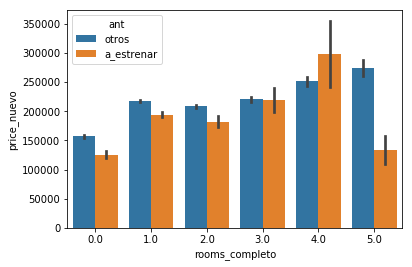

In [367]:
#Graficamos el precio promedio de las viviendas a estrenar vs las que no lo son por la cantidad de habitaciones
ax = sns.barplot(x="rooms_completo", y="price_nuevo", hue="ant", data=data_amba_sin_outliers_sin_negocios_menos_cinco_hab_precio)

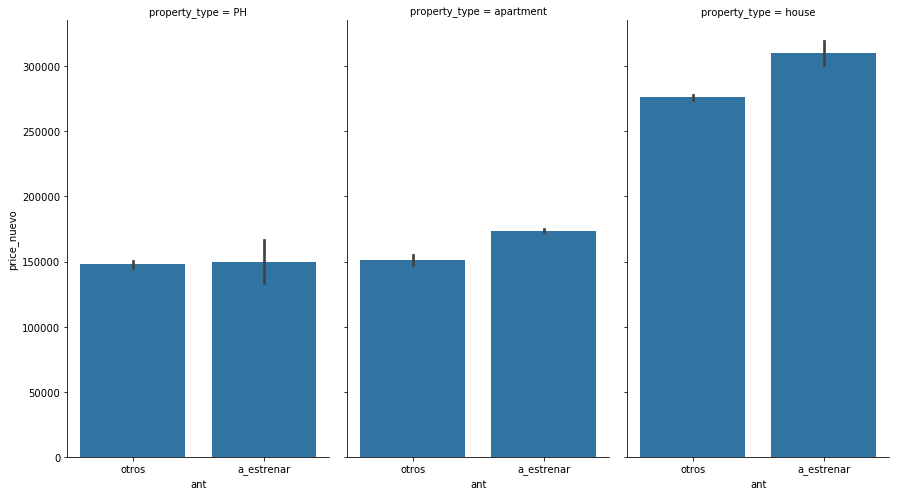

In [368]:
g = sns.FacetGrid(data_amba_sin_outliers_sin_negocios_menos_cinco_hab_precio, col = "property_type", height=7, aspect=.6)
g.map(sns.barplot, "ant", "price_nuevo")

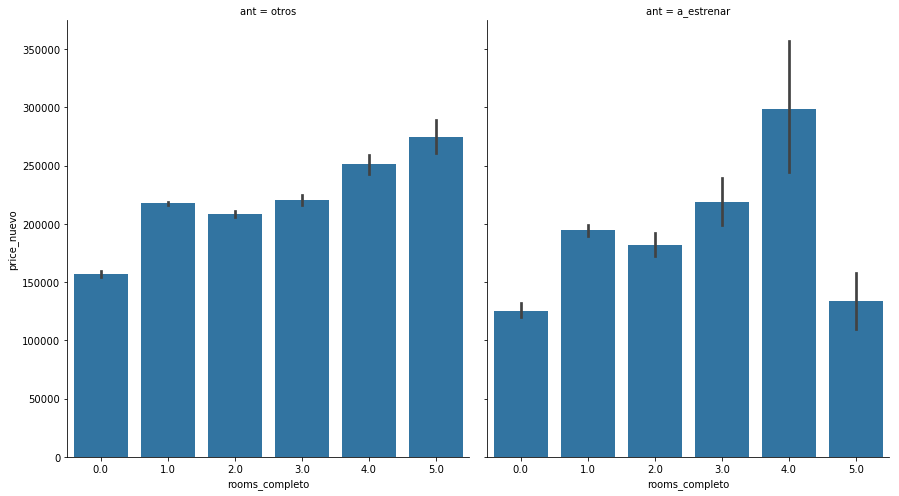

In [369]:
g = sns.FacetGrid(data_amba_sin_outliers_sin_negocios_menos_cinco_hab_precio, col = "ant", height=7, aspect=.9)
g.map(sns.barplot, "rooms_completo", "price_nuevo");

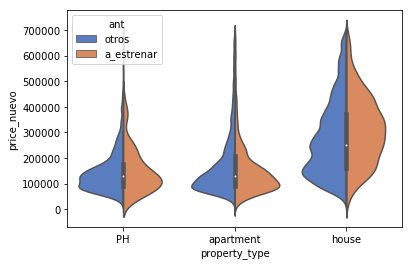

In [420]:
ax = sns.violinplot(x="property_type", y="price_nuevo", hue="ant",
                    data=data_amba_sin_outliers_sin_negocios_menos_cinco_hab_precio, palette="muted", split=True)

#### Conclusion: No se puede establecer que los inmuebles a estrenar tienen un valor significativamente mayor con los datos obtenidos.

<a id="section_mito_2"></a> 

### Mito o Realidad N° 2: Existe una correlación entre el precio del inmueble y las expensas que abonan

[volver a Indice](#section_indice)


In [370]:
#Elimino del análisis los outliers de expensas

q1 = data_amba_sin_outliers_precio.expenses_nuevo.quantile(0.25)
print(q1)
q2 = data_amba_sin_outliers_precio.expenses_nuevo.quantile(0.5)
print(q2)
q3 = data_amba_sin_outliers_precio.expenses_nuevo.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

limite_superior_expensas = q3 + iqr
limite_inferior_expensas = q1 - iqr

print(limite_superior_expensas)
print(limite_inferior_expensas)


outlier_mask_sup_expensas = data_amba_sin_outliers_precio.expenses_nuevo > limite_superior_expensas
outlier_mask_inf_expensas = data_amba_sin_outliers_precio.expenses_nuevo < limite_inferior_expensas
outlier_mask_expensas = np.logical_or(outlier_mask_sup_expensas, outlier_mask_inf_expensas)
not_outliers_expensas = np.logical_not(outlier_mask_expensas)
data_amba_sin_outliers_expensas = data_amba_sin_outliers_precio[not_outliers_expensas]

0.0
1982.2195506503745
3301.497719209326
8253.744298023315
-4952.246578813989


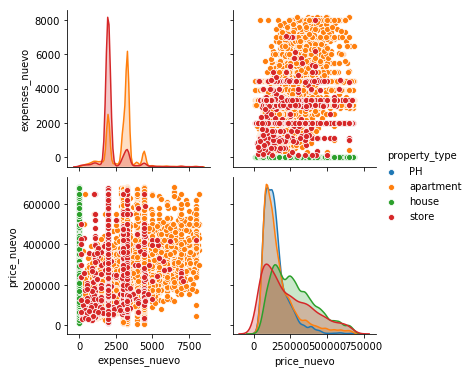

In [371]:
sns.pairplot(data_amba_sin_outliers_expensas.loc[:, ('expenses_nuevo', 'price_nuevo', 'state_name', 'property_type')], hue="property_type")

#### Conclusion: Gráficamente no se observa relación entre el precio de la propiedad y las expensas que abona.

In [372]:
# with sns.axes_style(style='ticks'):
#     g = sns.catplot("property_type", "price_nuevo", "state_name", data=data_amba_sin_outliers_precio, kind="box")
#     g.set_axis_labels("Tipo de vivienda", "Precio de vivienda");

<a id="section_mito_3"></a> 

### Mito o Realidad N° 3: Dentro del AMBA, Properati tiene mayor participación en Capital Federal

[volver a Indice](#section_indice)


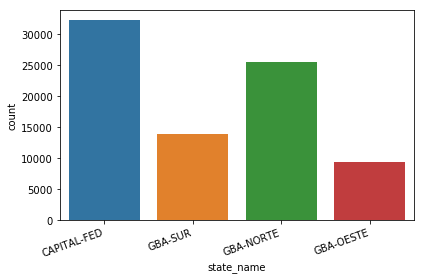

In [421]:
#Graficamos la distribucion del mercado de Properati
ax = sns.countplot(x="state_name", data=data_amba)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

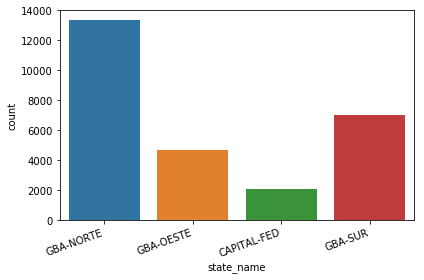

In [422]:
#Graficamos que participacion de mercado tiene el producto "house"
mask = data_amba["property_type"] == "house"
house = data_amba.loc[mask, :]
ax = sns.countplot(x="state_name", data=house)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
plt.tight_layout()
plt.show()

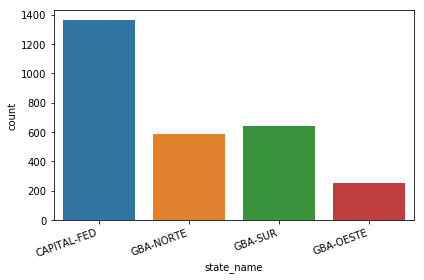

In [423]:
#Graficamos que participacion de mercado tiene el producto "store"
mask = data_amba["property_type"] == "store"
store = data_amba.loc[mask, :]
ax = sns.countplot(x="state_name", data=store)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
plt.tight_layout()
plt.show()

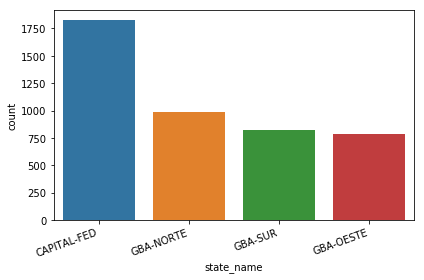

In [424]:
#Graficamos que participacion de mercado tiene el producto "PH"
mask = data_amba["property_type"] == "PH"
ph = data_amba.loc[mask, :]
ax = sns.countplot(x="state_name", data=ph)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
plt.tight_layout()
plt.show()

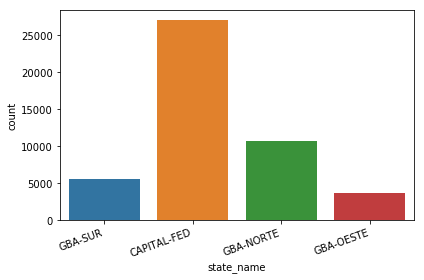

In [425]:
#Graficamos que participacion de mercado tiene el producto "apartment"
mask = data_amba["property_type"] == "apartment"
apartment = data_amba.loc[mask, :]
ax = sns.countplot(x="state_name", data=apartment)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")
plt.tight_layout()
plt.show()

#### Conclusion: Efectivamente, dentro del AMBA Properati tiene mayor participación en Capital Federal

<a id="section_mito_4"></a> 

### Mito o Realidad N° 4: A medida que un departamento está un piso más elevado, aumenta su precio

[volver a Indice](#section_indice)


In [374]:
tipo_propiedad = data.groupby('property_type')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20, 30, 40, 50, 1000, 2000]
pisos = pd.cut(data.floor_copia, bins, right = False)

In [375]:
data.pivot_table('floor_copia', index = [pisos], columns= 'property_type', aggfunc={'floor_copia': 'count'})

property_type,PH,apartment,house,store
floor_copia,,,,
"[0, 1)",1472,6709,23913,861
"[1, 2)",1500,5161,7484,496
"[2, 3)",860,5385,6835,183
"[3, 4)",141,2539,761,46
"[4, 5)",49,1854,111,21
"[5, 6)",39,1221,36,9
"[6, 7)",42,1350,22,10
"[7, 8)",27,1089,13,7
"[8, 9)",12,1357,10,13


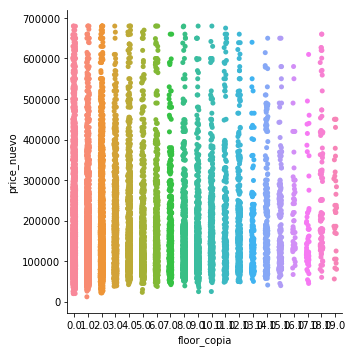

In [377]:
data_amba_menor_a_piso_20 = data_amba[data_amba.floor_copia<20]
data_amba_menor_a_piso_20_sin_outliers_precio = data_amba_menor_a_piso_20[data_amba_menor_a_piso_20.price_nuevo<685000] 
house = data_amba_menor_a_piso_20_sin_outliers_precio[data.property_type == 'apartment']
sns.catplot(x="floor_copia", y="price_nuevo", data=house);

#### Conclusion: Se puede observar que se encuentran pocos departamentos en pisos altos y caros.

<a id="section_mito_5"></a> 

### Mito o Realidad N° 5: La presencia de amenities en la propiedad impacta en un aumento en el precio de la misma.

[volver a Indice](#section_indice)


In [399]:
data_amba.replace({'state_name':{'Bs.As. G.B.A. Zona Norte':'GBA-NORTE','Bs.As. G.B.A. Zona Oeste':'GBA-OESTE',\
                                'Capital Federal':'CAPITAL-FED','Bs.As. G.B.A. Zona Sur':'GBA-SUR'}}, inplace=True)
data_amba.state_name.value_counts()

CAPITAL-FED    32316
GBA-NORTE      25560
GBA-SUR        13952
GBA-OESTE       9322
Name: state_name, dtype: int64

In [400]:
data_amba.loc[:,"AMENITIES"]=False

In [401]:
mask = (data_amba.loc[:,"PARRILLA"]==True) & (data_amba.loc[:,"PATIO_JARDIN"]==True) & (data_amba.loc[:,"PILETA"]==True)

In [402]:
data_amba.loc[mask,"AMENITIES"] = True

In [403]:
data_amba

,property_type,place_name,state_name,description,title,rooms_completo,PILETA,PARRILLA,PATIO_JARDIN,expenses_bool,expenses_nuevo,geonames_id_nuevo,lat-lon_nuevo,lat_nuevo,lon_nuevo,floor_copia,description_copia,title_copia,ant,price_nuevo,currency_nuevo,price_aprox_local_currency_nuevo,price_aprox_usd_nuevo,surface_total_in_m2_nuevo,surface_covered_in_m2_nuevo,price_usd_per_m2_nuevo,price_per_m2_nuevo,pais,provincia,localidad,zona,barrio,lugar,AMENITIES
0,PH,Mataderos,CAPITAL-FED,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,0.0,False,False,False,NO,0.000000,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,0.0,,,otros,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,19890.163636,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos,False
1,apartment,La Plata,GBA-SUR,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,2.0,False,False,False,SI,3019.709032,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,10.0,,,a_estrenar,150000.0,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,La Plata,La Plata,False
2,apartment,Mataderos,CAPITAL-FED,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,0.0,False,False,False,SI,1982.219551,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,3.0,,,otros,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,23098.254545,Argentina,Capital Federal,Mataderos,Mataderos,Mataderos,Mataderos,False
3,PH,Liniers,CAPITAL-FED,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,2.0,False,False,True,NO,0.000000,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,1.0,,,otros,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,Argentina,Capital Federal,Liniers,Liniers,Liniers,Liniers,False
6,PH,Munro,GBA-NORTE,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",1.0,False,False,True,NO,0.000000,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,0.0,,,otros,130000.0,USD,2293785.00,130000.0,106.0,78.0,1226.415094,21639.481132,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,Munro,Munro,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121214,store,San Isidro,GBA-NORTE,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,0.0,False,False,False,SI,1982.219551,3428983.0,"-34.478067, -58.536362",-34.478067,-58.536362,NaN,***venta con renta***local en edificio lomas ...,local - san isidro,otros,NaN,NaN,NaN,NaN,123.0,123.0,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,San Isidro,San Isidro,San Isidro,False
121215,apartment,Belgrano,CAPITAL-FED,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,1.0,True,True,False,SI,10000.000000,3436077.0,"-34.563541, -58.453904",-34.563541,-58.453904,NaN,torre forum alcorta - máxima categoría.impecab...,torre forum alcorta- impecable 3 ambientes,otros,870000.0,USD,15350715.00,870000.0,113.0,93.0,7699.115044,135847.035398,Argentina,Capital Federal,Belgrano,Belgrano,Belgrano,Belgrano,False
121216,house,Beccar,GBA-NORTE,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,1.0,True,True,True,NO,0.000000,3436080.0,NaN,NaN,NaN,0.0,,,otros,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,24408.225000,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,Beccar,Beccar,True
121217,apartment,Villa Urquiza,CAPITAL-FED,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,0.0,False,False,False,SI,1982.219551,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,NaN,venta departamento ambiente divisible a estren...,venta departamento ambiente divisible a estren...,otros,131500.0,USD,2320251.75,131500.0,46.0,39.0,2858.695652,50440.255435,Argentina,

In [404]:
#data_amba_group= data_amba.groupby(["place_name","state_name"])
data_amba_filtr = data_amba[(data_amba.property_type !="local")]
data_amba_filtrada = data_amba_filtr[data_amba_filtr.price_nuevo>6850]
# data_amba_filtrada
data_amba_group= data_amba_filtrada.groupby(["place_name","state_name"])
precio_promedio = data_amba_group[["price_nuevo","rooms_completo"]].mean()
precio_promedio.reset_index(level=0, inplace=True)
# precio_promedio.reset_index(level=0, inplace=True)
precio_promedio

,place_name,price_nuevo,rooms_completo
state_name,,,
GBA-NORTE,Country Maschwitz Club,311666.666667,1.333333
GBA-NORTE,los alamos,81600.000000,1.000000
GBA-SUR,9 de Abril,270000.000000,0.333333
CAPITAL-FED,Abasto,179511.039604,1.485149
GBA-SUR,Abasto,130000.000000,0.875000
...,...,...,...
GBA-NORTE,Virreyes,144719.512195,1.243902
GBA-SUR,Wilde,132862.307692,1.400000
GBA-OESTE,William Morris,210000.000000,3.000000


In [405]:
precio_promedio.reset_index(level=0, inplace=True)

In [406]:
precio_promedio

,state_name,place_name,price_nuevo,rooms_completo
0,GBA-NORTE,Country Maschwitz Club,311666.666667,1.333333
1,GBA-NORTE,los alamos,81600.000000,1.000000
2,GBA-SUR,9 de Abril,270000.000000,0.333333
3,CAPITAL-FED,Abasto,179511.039604,1.485149
4,GBA-SUR,Abasto,130000.000000,0.875000
...,...,...,...,...
519,GBA-NORTE,Virreyes,144719.512195,1.243902
520,GBA-SUR,Wilde,132862.307692,1.400000
521,GBA-OESTE,William Morris,210000.000000,3.000000
522,GBA-NORTE,Zelaya,129857.142857,0.857143


In [431]:
def mostrar_join_plot(data_grafico,zona):
    mask_place= data_grafico["state_name"] == zona
    print("Comparación promedio de rooms vs precio de ",zona)
    g = (sns.jointplot(x="rooms_completo", y="price_nuevo",
                   data=data_grafico[mask_place], color="k",  xlim = (0,4), ylim = (0,700000))
        .plot_joint(sns.kdeplot, zorder=0, n_levels=10))
 #   g.ax_marg_x.set_xlim(-1, 4)
    return zona

Se realiza una comparación del precio según la cantidad de Habitaciones para validar si tienen relación directa. 
Se separa en zonas geográficas para comparar las variaciones


Comparación promedio de rooms vs precio de  GBA-OESTE


'GBA-OESTE'

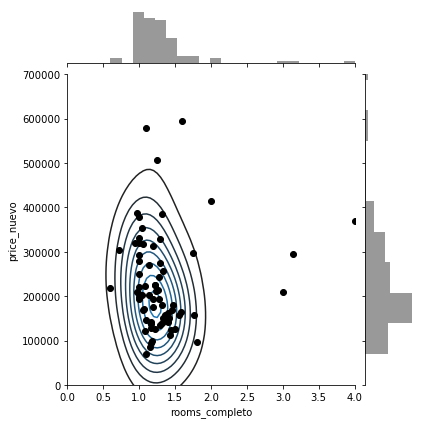

In [432]:
mostrar_join_plot(precio_promedio,'GBA-OESTE')

Comparación promedio de rooms vs precio de  GBA-NORTE


'GBA-NORTE'

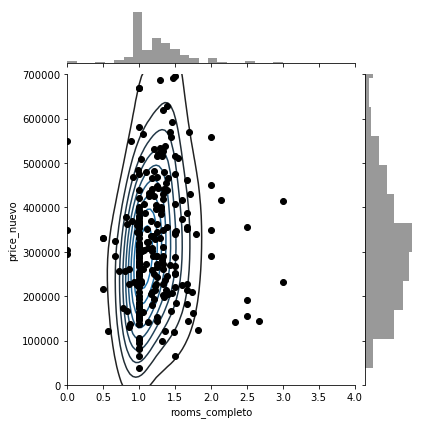

In [433]:
mostrar_join_plot(precio_promedio,'GBA-NORTE')

Comparación promedio de rooms vs precio de  CAPITAL-FED


'CAPITAL-FED'

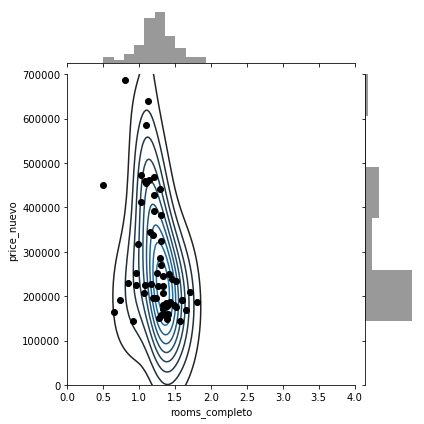

In [434]:
mostrar_join_plot(precio_promedio,'CAPITAL-FED')

Comparación promedio de rooms vs precio de  GBA-SUR


'GBA-SUR'

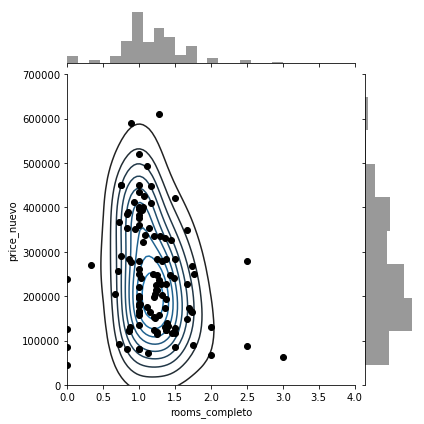

In [435]:
mostrar_join_plot(precio_promedio,'GBA-SUR')

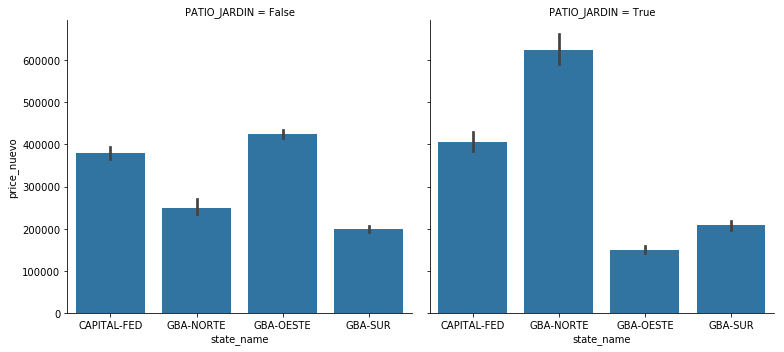

In [436]:
g = sns.FacetGrid(data_amba_filtrada, col = "PATIO_JARDIN", height=5, aspect=1.1)
g.map(sns.barplot, "state_name", "price_nuevo");

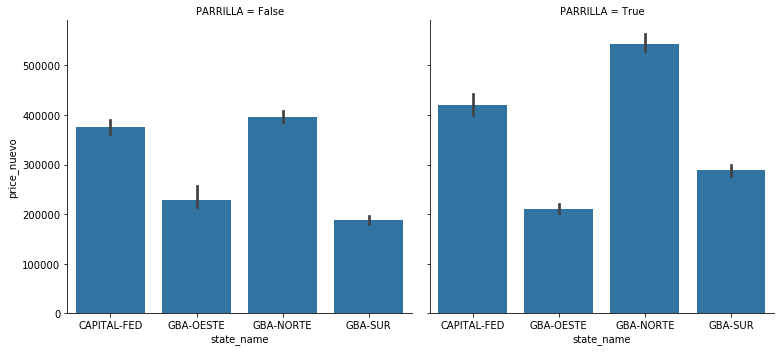

In [437]:
g = sns.FacetGrid(data_amba_filtrada, col = "PARRILLA", height=5, aspect=1.1)
g.map(sns.barplot, "state_name", "price_nuevo");

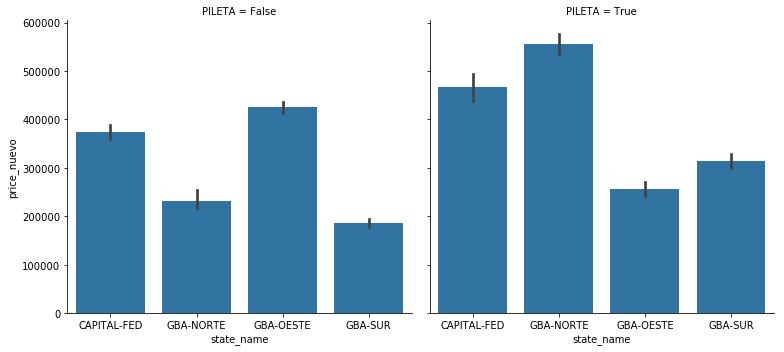

In [414]:
g = sns.FacetGrid(data_amba_filtrada, col = "PILETA", height=5, aspect=1.1)
g.map(sns.barplot, "state_name", "price_nuevo");

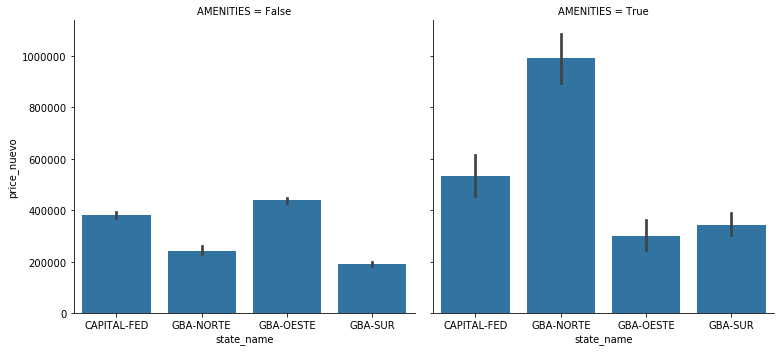

In [415]:
g = sns.FacetGrid(data_amba_filtrada, col = "AMENITIES", height=5, aspect=1.1)
g.map(sns.barplot, "state_name", "price_nuevo");

#### Conclusion: En reglas generales, se observa un incremento del precio de la propiedad cuando la misma cuenta con amenities.

<a id="section_mito_6"></a> 

### Mito o Realidad N° 6: Hay una mayor proporcion de inmuebles pequeños en la base de Properati.

[volver a Indice](#section_indice)


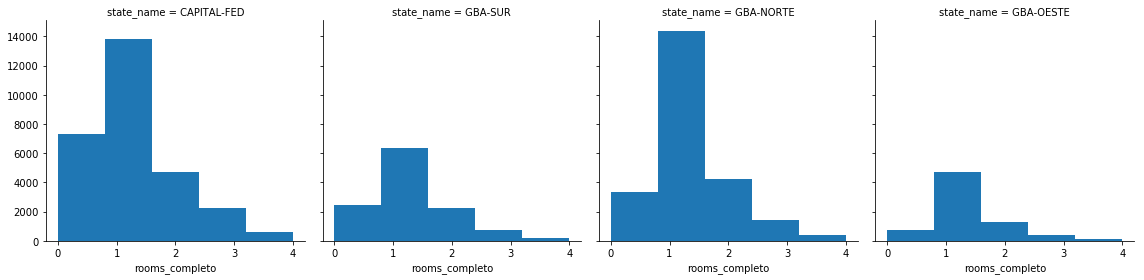

In [416]:
g = sns.FacetGrid(data_amba_filtrada[data_amba_filtrada.rooms_completo<=4], col="state_name", height=4, aspect=1)
g = g.map(plt.hist, "rooms_completo", bins=5)

#### Conclusion: En todo el AMBA, los departamentos con una habitación son los que más gestiona Properati.